In [ ]:
# prompt: load /content/drive/MyDrive/merged_all_keypoints_b_label_only.csv and /content/drive/MyDrive/engagement_cleaned.csv

import pandas as pd

# Load the first CSV file
df1 = pd.read_csv('/content/drive/MyDrive/merged_all_keypoints_b_label_only.csv')

# Load the second CSV file
df2 = pd.read_csv('/content/drive/MyDrive/engagement_cleaned.csv')

# Now you have two pandas DataFrames: df1 and df2
# You can work with them, for example, print the first few rows:
# print(df1.head())
# print(df2.head())


In [ ]:
df2

,video_id,time,watching,playing_engaged,playfully_engaged,angrily_engaged,seconds
0,Fp13,00:00:37,1,0,0,0,37
1,Fp13,00:01:07,1,2,1,0,67
2,Fp13,00:01:37,1,0,0,0,97
3,Fp13,00:02:07,1,0,0,0,127
4,Fp14,00:00:55,1,0,0,0,55
...,...,...,...,...,...,...,...
176,Fp38,00:07:14,1,0,0,0,434
177,Fp39,00:05:04,1,2,1,0,304
178,Fp39,00:06:13,1,2,1,0,373
179,Fp40,00:08:17,1,2,1,0,497


In [ ]:
df1

,frame,sec,tracking_id,kp0_x,kp0_y,kp1_x,kp1_y,kp2_x,kp2_y,kp3_x,...,kp12_y,kp13_x,kp13_y,kp14_x,kp14_y,kp15_x,kp15_y,kp16_x,kp16_y,source_video
0,1,0.04,68,396,702,392,689,392,702,341,...,955,392,935,374,869,296,756,422,855,P16
1,2,0.08,68,396,690,396,690,393,690,319,...,955,378,869,396,869,293,756,419,856,P16
2,3,0.12,68,368,693,368,693,368,693,324,...,956,379,871,397,858,401,858,419,858,P16
3,4,0.16,68,371,714,371,694,368,694,313,...,956,404,943,400,858,397,858,422,858,P16
4,5,0.20,68,369,714,362,714,373,707,326,...,955,402,942,373,870,402,857,420,857,P16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520982,17493,699.72,24,523,768,518,744,518,744,435,...,978,417,948,558,912,562,888,575,840,Fp29
520983,17494,699.76,24,523,769,518,745,518,745,435,...,980,558,902,610,889,562,889,575,841,Fp29
520984,17495,699.80,24,518,769,518,745,518,745,435,...,980,557,902,610,889,562,889,575,841,Fp29
520985,17496,699.84,24,519,768,519,750,519,750,436,...,979,523,888,562,907,540,840,579,840,Fp29


In [ ]:
import pandas as pd
import numpy as np

# Load your data
df_keypoints = pd.read_csv("/content/drive/MyDrive/merged_all_keypoints_b_label_only.csv")
df_engagement = pd.read_csv("/content/drive/MyDrive/engagement_cleaned.csv")

# Round seconds in both dataframes
df_keypoints["sec_rounded"] = df_keypoints["sec"].round().astype(int)
df_engagement["seconds_rounded"] = df_engagement["seconds"].round().astype(int)

# Create a helper column for matching
df_keypoints["merge_key"] = list(zip(df_keypoints["source_video"], df_keypoints["sec_rounded"]))
df_engagement["merge_key"] = list(zip(df_engagement["video_id"], df_engagement["seconds_rounded"]))

# Create a dictionary mapping (video_id, second) to the engagement labels
engagement_lookup = {}

for _, row in df_engagement.iterrows():
    video = row["video_id"]
    second = int(row["seconds_rounded"])
    labels = row.drop(["video_id", "seconds", "seconds_rounded", "merge_key"])

    for offset in range(-15, 16):  # Tolerance of ±15 seconds
        engagement_lookup[(video, second + offset)] = labels

# Apply engagement labels to keypoints data
engagement_columns = df_engagement.columns.difference(["video_id", "seconds", "seconds_rounded", "merge_key"])
for col in engagement_columns:
    df_keypoints[col] = df_keypoints["merge_key"].map(lambda key: engagement_lookup.get(key, pd.Series([np.nan]*len(engagement_columns)))[col])

# Drop helper columns
df_keypoints.drop(columns=["sec_rounded", "merge_key"], inplace=True)

# Save the merged dataframe
df_keypoints.to_csv("merged_with_engagement_labels.csv", index=False)

print("✅ Merged file saved as: merged_with_engagement_labels.csv")


KeyError: 'angrily_engaged'

In [ ]:
import pandas as pd
import numpy as np

# Load your data
df_keypoints = pd.read_csv("/content/drive/MyDrive/merged_all_keypoints_b_label_only.csv")
df_engagement = pd.read_csv("/content/drive/MyDrive/engagement_cleaned.csv")

# Round seconds in both dataframes
df_keypoints["sec_rounded"] = df_keypoints["sec"].round().astype(int)
df_engagement["seconds_rounded"] = df_engagement["seconds"].round().astype(int)

# Create a helper column for matching
df_keypoints["merge_key"] = list(zip(df_keypoints["source_video"], df_keypoints["sec_rounded"]))
df_engagement["merge_key"] = list(zip(df_engagement["video_id"], df_engagement["seconds_rounded"]))

# Create a dictionary mapping (video_id, second) to the engagement labels
engagement_lookup = {}

for _, row in df_engagement.iterrows():
    video = row["video_id"]
    second = int(row["seconds_rounded"])
    labels = row.drop(["video_id", "seconds", "seconds_rounded", "merge_key"])

    for offset in range(-15, 16):  # Tolerance of ±15 seconds
        engagement_lookup[(video, second + offset)] = labels.to_dict() # Convert labels to a dictionary

# Apply engagement labels to keypoints data
engagement_columns = df_engagement.columns.difference(["video_id", "seconds", "seconds_rounded", "merge_key"])
for col in engagement_columns:
    df_keypoints[col] = df_keypoints["merge_key"].map(lambda key: engagement_lookup.get(key, {}).get(col, np.nan)) # Access using column name and handle missing values

# Drop helper columns
df_keypoints.drop(columns=["sec_rounded", "merge_key"], inplace=True)

# Save the merged dataframe
df_keypoints.to_csv("merged_with_engagement_labels.csv", index=False)

print("✅ Merged file saved as: merged_with_engagement_labels.csv")

✅ Merged file saved as: merged_with_engagement_labels.csv


In [ ]:
import pandas as pd
import numpy as np

# Load your data
df_keypoints = pd.read_csv("/content/drive/MyDrive/merged_all_keypoints_b_label_only.csv")
df_engagement = pd.read_csv("engagement_cleaned.csv",sep=';')

# Round seconds
df_keypoints["sec_rounded"] = df_keypoints["sec"].round().astype(int)
df_engagement["seconds_rounded"] = df_engagement["seconds"].round().astype(int)

# Sort for forward search
df_keypoints.sort_values(by=["source_video", "sec_rounded"], inplace=True)
df_engagement.sort_values(by=["video_id", "seconds_rounded"], inplace=True)

# Create a list to store matches
matched_rows = []

# Iterate over keypoints
for idx, row in df_keypoints.iterrows():
    video = row["source_video"]
    frame_sec = row["sec_rounded"]

    # Filter engagement labels for same video and future timestamps
    future_engagements = df_engagement[
        (df_engagement["video_id"] == video) &
        (df_engagement["seconds_rounded"] >= frame_sec) &
        (df_engagement["seconds_rounded"] <= frame_sec + 30)
    ]

    if not future_engagements.empty:
        # Take the first future label (i.e., nearest next engagement)
        label_row = future_engagements.iloc[0]
        label_data = label_row.drop(["video_id", "seconds", "seconds_rounded", "merge_key"], errors="ignore").to_dict()
    else:
        label_data = {col: np.nan for col in df_engagement.columns if col not in ["video_id", "seconds", "seconds_rounded", "merge_key"]}

    # Append label columns to the current keypoint row
    new_row = row.to_dict()
    new_row.update(label_data)
    matched_rows.append(new_row)

# Convert list to DataFrame
merged_df = pd.DataFrame(matched_rows)

# Drop helper column
merged_df.drop(columns=["sec_rounded"], inplace=True)

# Save the new merged DataFrame
merged_df.to_csv("merged_with_forward_labels.csv", index=False)

print("✅ Merged with forward matching saved to: merged_with_forward_labels_with_tasks.csv")


✅ Merged with forward matching saved to: merged_with_forward_labels_with_tasks.csv


In [ ]:
merged_df

,frame,sec,tracking_id,kp0_x,kp0_y,kp1_x,kp1_y,kp2_x,kp2_y,kp3_x,...,kp15_y,kp16_x,kp16_y,source_video,time,watching,playing_engaged,playfully_engaged,angrily_engaged,task
0,2,0.08,164,348,796,348,782,337,792,291,...,868,405,868,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
1,3,0.12,164,348,797,351,779,337,793,340,...,853,407,877,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
2,4,0.16,164,350,796,350,781,338,796,342,...,879,398,879,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
3,5,0.20,164,350,798,350,781,337,792,342,...,876,346,927,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
4,6,0.24,164,351,799,351,787,338,793,297,...,875,383,875,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520982,15101,604.04,68,472,737,486,716,449,723,505,...,845,528,924,P16,NaN,NaN,NaN,NaN,NaN,NaN
520983,15102,604.08,68,473,737,487,716,450,723,505,...,845,529,910,P16,NaN,NaN,NaN,NaN,NaN,NaN
520984,15103,604.12,68,473,737,487,716,450,723,505,...,844,529,923,P16,NaN,NaN,NaN,NaN,NaN,NaN
520985,15104,604.16,68,474,738,488,716,451,723,502,...,845,530,923,P16,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
df_keypoints=pd.read_csv("merged_with_forward_labels.csv",sep=',',low_memory=False)


In [ ]:
df_keypoints

,frame,sec,tracking_id,kp0_x,kp0_y,kp1_x,kp1_y,kp2_x,kp2_y,kp3_x,...,kp15_y,kp16_x,kp16_y,source_video,time,watching,playing_engaged,playfully_engaged,angrily_engaged,task
0,2,0.08,164,348,796,348,782,337,792,291,...,868,405,868,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
1,3,0.12,164,348,797,351,779,337,793,340,...,853,407,877,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
2,4,0.16,164,350,796,350,781,338,796,342,...,879,398,879,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
3,5,0.20,164,350,798,350,781,337,792,342,...,876,346,927,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
4,6,0.24,164,351,799,351,787,338,793,297,...,875,383,875,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520982,15101,604.04,68,472,737,486,716,449,723,505,...,845,528,924,P16,NaN,NaN,NaN,NaN,NaN,NaN
520983,15102,604.08,68,473,737,487,716,450,723,505,...,845,529,910,P16,NaN,NaN,NaN,NaN,NaN,NaN
520984,15103,604.12,68,473,737,487,716,450,723,505,...,844,529,923,P16,NaN,NaN,NaN,NaN,NaN,NaN
520985,15104,604.16,68,474,738,488,716,451,723,502,...,845,530,923,P16,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df=df_keypoints

### EXP 1

In [ ]:
# --- 1. Load the Data --
df=merged_df[merged_df["task"]=='p']
print("Data loaded successfully.")
print("Shape of the dataframe:", df.shape)


Data loaded successfully.
Shape of the dataframe: (47208, 44)


In [ ]:
df

,frame,sec,tracking_id,kp0_x,kp0_y,kp1_x,kp1_y,kp2_x,kp2_y,kp3_x,...,kp15_y,kp16_x,kp16_y,source_video,time,watching,playing_engaged,playfully_engaged,angrily_engaged,task
0,2,0.08,164,348,796,348,782,337,792,291,...,868,405,868,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
1,3,0.12,164,348,797,351,779,337,793,340,...,853,407,877,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
2,4,0.16,164,350,796,350,781,338,796,342,...,879,398,879,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
3,5,0.20,164,350,798,350,781,337,792,342,...,876,346,927,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
4,6,0.24,164,351,799,351,787,338,793,297,...,875,383,875,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404155,3758,150.32,233,220,568,214,537,189,558,108,...,960,357,888,Fp40,00:02:30,1.0,0.0,0.0,0.0,p
404156,3759,150.36,233,216,578,216,537,191,558,197,...,681,311,671,Fp40,00:02:30,1.0,0.0,0.0,0.0,p
404157,3760,150.40,233,215,568,215,537,190,558,203,...,774,334,733,Fp40,00:02:30,1.0,0.0,0.0,0.0,p
404158,3761,150.44,233,216,570,216,539,192,560,210,...,756,130,828,Fp40,00:02:30,1.0,0.0,0.0,0.0,p


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer





# --- 2. Define Target (y) and Prepare for Feature (X) Selection ---
target_column = 'playfully_engaged'
video_id_column = 'source_video' # IMPORTANT: Verify this is the correct column name for video IDs in your CSV

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in the dataframe.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

if video_id_column not in df.columns:
    print(f"Error: Video ID column '{video_id_column}' for data splitting not found.")
    print(f"Please ensure '{video_id_column}' exists or update the 'video_id_column' variable.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Drop rows where the target variable is NaN, as they cannot be used for training or evaluation.
df.dropna(subset=[target_column], inplace=True)
print(f"\nShape of dataframe after dropping NaNs in target column '{target_column}': {df.shape}")

# Convert target variable to numeric if it's not already
if df[target_column].dtype == 'bool':
    df[target_column] = df[target_column].astype(int)
elif df[target_column].dtype == 'object':
    print(f"Target column '{target_column}' is of object type. Attempting to encode it.")
    le = LabelEncoder()
    try:
        df[target_column] = le.fit_transform(df[target_column])
        print(f"Target column '{target_column}' encoded. Classes: {le.classes_}")
        if len(le.classes_) > 2:
            print("Warning: Target variable has more than two classes. This will be a multi-class SVM.")
        elif len(le.classes_) <= 1:
            print(f"Error: Target column '{target_column}' has only one class after encoding ({le.classes_}). Cannot train a classifier.")
            exit()
    except Exception as e:
        print(f"Error encoding target column '{target_column}': {e}")
        print("Please ensure the target column contains appropriate values for classification.")
        exit()

# Define feature columns
# Identify potential keypoint columns (typically floats or integers)
potential_feature_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columns to exclude from features (USER UPDATED LIST)
# This list now means other engagement labels (like focused_engagement) MIGHT become features if numeric
columns_to_exclude_from_features = [
    target_column, video_id_column, # video_id_column is used for splitting, not as a feature
    'video_id', # if 'video_id' is different from video_id_column and also an identifier
    'sec', 'seconds', 'seconds_rounded', 'sec_rounded', 'merge_key',
    'angrily_engaged', 'playing_engaged', 'time', 'watching', 'frame', 'tracking_id','task'
]
# Add any other known non-feature or identifier columns if necessary.

# Filter out columns from the exclusion list that might not exist in the dataframe
columns_to_exclude_from_features = [col for col in columns_to_exclude_from_features if col in df.columns]

feature_cols = [col for col in potential_feature_cols if col not in columns_to_exclude_from_features]

if not feature_cols:
    print("Error: No feature columns were identified. Please check the column names, types, and exclusion list.")
    print(f"Potential numeric columns found: {potential_feature_cols}")
    print(f"Columns excluded: {columns_to_exclude_from_features}")
    exit()

print(f"\nIdentified {len(feature_cols)} feature columns: {feature_cols}")
print(f"Target column: {target_column}")
print(f"Video ID column for splitting: {video_id_column}")

# --- 3. Split Data into Training and Testing Sets based on Video IDs ---
unique_videos = df[video_id_column].unique()
print(f"\nFound {len(unique_videos)} unique videos for splitting.")

if len(unique_videos) < 2: # Need at least one video for train and one for test
    print("Error: Not enough unique videos to perform a train/test split. Need at least 2.")
    exit()
# Ensure test_size is not too large for the number of videos
test_size_videos = 0.3
if len(unique_videos) * test_size_videos < 1:
    print(f"Warning: Number of unique videos ({len(unique_videos)}) is small. Adjusting test_size for videos to ensure at least 1 test video.")
    # Ensure at least 1 video for testing, if possible.
    # If only 2 videos, it will be 1 train, 1 test. If 3, 2 train, 1 test.
    test_video_count = 1
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_video_count, random_state=21, shuffle=True)
else:
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_size_videos, random_state=21, shuffle=True)


print(f"Number of videos in training set: {len(train_video_ids)}")
print(f"Number of videos in testing set: {len(test_video_ids)}")

if len(train_video_ids) == 0 or len(test_video_ids) == 0:
    print("Error: Splitting videos resulted in an empty training or testing set of videos.")
    exit()

# Create training and testing dataframes
train_df = df[df[video_id_column].isin(train_video_ids)].copy() # Use .copy() to avoid SettingWithCopyWarning
test_df = df[df[video_id_column].isin(test_video_ids)].copy()

if train_df.empty or test_df.empty:
    print("Error: Training or testing dataframe is empty after filtering by video IDs.")
    exit()

X_train = train_df[feature_cols]
y_train = train_df[target_column]
X_test = test_df[feature_cols]
y_test = test_df[target_column]

print("\nData split into training and testing sets based on video IDs.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

if X_train.empty or X_test.empty:
    print("Error: X_train or X_test is empty. Check feature selection and data splitting.")
    exit()

print("Distribution of target variable in training set:\n", y_train.value_counts(normalize=True))
print("Distribution of target variable in test set:\n", y_test.value_counts(normalize=True))

# --- 4. Handle Missing Values in Features (Post-Split) ---
print(f"\nMissing values in X_train before imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test before imputation: {X_test.isnull().sum().sum()}")

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Use transform only on test data

# Convert imputed arrays back to DataFrames with original column names
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test after imputation: {X_test.isnull().sum().sum()}")

# --- 5. Scale Numerical Features (Post-Split and Post-Imputation) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform only on test data

print("\nFeatures scaled.")


Shape of dataframe after dropping NaNs in target column 'playfully_engaged': (47208, 44)

Identified 34 feature columns: ['kp0_x', 'kp0_y', 'kp1_x', 'kp1_y', 'kp2_x', 'kp2_y', 'kp3_x', 'kp3_y', 'kp4_x', 'kp4_y', 'kp5_x', 'kp5_y', 'kp6_x', 'kp6_y', 'kp7_x', 'kp7_y', 'kp8_x', 'kp8_y', 'kp9_x', 'kp9_y', 'kp10_x', 'kp10_y', 'kp11_x', 'kp11_y', 'kp12_x', 'kp12_y', 'kp13_x', 'kp13_y', 'kp14_x', 'kp14_y', 'kp15_x', 'kp15_y', 'kp16_x', 'kp16_y']
Target column: playfully_engaged
Video ID column for splitting: source_video

Found 17 unique videos for splitting.
Number of videos in training set: 11
Number of videos in testing set: 6

Data split into training and testing sets based on video IDs.
X_train shape: (29029, 34)
X_test shape: (18179, 34)
y_train shape: (29029,)
y_test shape: (18179,)
Distribution of target variable in training set:
 playfully_engaged
1.0    0.63943
0.0    0.36057
Name: proportion, dtype: float64
Distribution of target variable in test set:
 playfully_engaged
1.0    0.59

<ipython-input-18-2e8314a7ccff>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[target_column], inplace=True)


In [ ]:


# --- 6. Train the SVM Model ---
print("\nTraining the SVM model...")
# Ensure y_train has more than one class for stratification or balanced class weights
if len(y_train.unique()) <= 1:
    print(f"Error: Training target variable 'y_train' has only one class: {y_train.unique()}. Cannot train classifier.")
    exit()

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, class_weight='balanced', probability=True)
svm_model.fit(X_train_scaled, y_train)
print("SVM model trained successfully.")

# --- 7. Make Predictions and Evaluate the Model ---
print("\nMaking predictions on the test set...")
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
if 'le' in globals() and hasattr(le, 'classes_'):
    target_names_report = [str(cls) for cls in le.classes_]
    # Ensure labels for confusion matrix and report match actual unique values in y_test/y_pred
    unique_test_labels_sorted = sorted(y_test.unique())
    # If le.classes_ were [False, True] -> [0, 1], and y_test contains 0, 1, this is fine.
    # If le.classes_ were ['A', 'B'] -> [0, 1], this is fine.
    # We need to ensure the order of target_names_report matches the sorted unique labels if they are numeric.
    if all(isinstance(c, (int, float)) for c in unique_test_labels_sorted) and \
       all(isinstance(c, str) for c in target_names_report) and \
       len(unique_test_labels_sorted) == len(target_names_report):
        # This attempts to map sorted numeric labels to the string names from LabelEncoder
        # This might need adjustment if LabelEncoder classes are not simple True/False or ordered strings
        report_labels_ordered = unique_test_labels_sorted
    else:
        report_labels_ordered = le.transform(le.classes_) # Use the transformed numeric values corresponding to le.classes_

else: # Fallback if LabelEncoder was not used (e.g., target was already 0/1)
    unique_test_labels_sorted = sorted(y_test.unique())
    target_names_report = [f"Class {i}" for i in unique_test_labels_sorted]
    report_labels_ordered = unique_test_labels_sorted

try:
    print(classification_report(y_test, y_pred, labels=report_labels_ordered, target_names=target_names_report, zero_division=0))
except Exception as e_report:
    print(f"Could not generate classification report with specific target names/labels: {e_report}")
    print(classification_report(y_test, y_pred, zero_division=0))


print("\nConfusion Matrix:")
try:
    cm = confusion_matrix(y_test, y_pred, labels=report_labels_ordered)
    print(pd.DataFrame(cm, index=target_names_report, columns=target_names_report))
except Exception as e_cm:
    print(f"Could not generate confusion matrix with specific labels/names: {e_cm}")
    cm = confusion_matrix(y_test, y_pred) # Fallback
    print(cm)


print("\n--- Script Finished ---")



Training the SVM model...
SVM model trained successfully.

Making predictions on the test set...

Accuracy: 0.8233

Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.79      0.78      0.78      7368
   Class 1.0       0.85      0.86      0.85     10811

    accuracy                           0.82     18179
   macro avg       0.82      0.82      0.82     18179
weighted avg       0.82      0.82      0.82     18179


Confusion Matrix:
           Class 0.0  Class 1.0
Class 0.0       5723       1645
Class 1.0       1567       9244

--- Script Finished ---


In [ ]:
# Assuming your data is loaded into df
# and you already split by video_id

# Example split (replace with your actual split if different)
unique_videos = df["source_video"].unique()
train_videos = unique_videos[:int(len(unique_videos) * 0.8)]
test_videos = unique_videos[int(len(unique_videos) * 0.8):]

# Filter the DataFrames
train_df = df[df["source_video"].isin(train_videos)]
test_df = df[df["source_video"].isin(test_videos)]

# Show unique video IDs
print("🎓 Train Set Video IDs:")
print(sorted(train_df["source_video"].unique()))

print("\n🧪 Test Set Video IDs:")
print(sorted(test_df["source_video"].unique()))


🎓 Train Set Video IDs:
['Fp17', 'Fp18', 'Fp19', 'Fp20', 'Fp21', 'Fp24', 'Fp27', 'Fp28', 'Fp29', 'Fp30', 'Fp31', 'Fp33', 'Fp34']

🧪 Test Set Video IDs:
['Fp35', 'Fp38', 'Fp39', 'Fp40']


### EXP 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV # Added GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Additional model imports (optional, for trying other models)
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb



# Store a list of columns before feature engineering to identify new ones later
original_columns = df.columns.tolist()

# --- 1.5. Feature Engineering ---
print("\n--- 1.5. Feature Engineering ---")

# IMPORTANT: Define your keypoint indices here!
# These are EXAMPLES. You MUST verify and update them based on YOUR data's keypoint model.
# (e.g., if your model's nose is keypoint 0, left_eye is 1, etc.)
KP_NOSE = 0
KP_LEFT_EYE = 1
KP_RIGHT_EYE = 2
KP_LEFT_EAR = 3
KP_RIGHT_EAR = 4
KP_LEFT_SHOULDER = 5
KP_RIGHT_SHOULDER = 6
KP_LEFT_ELBOW = 7
KP_RIGHT_ELBOW = 8
KP_LEFT_WRIST = 9
KP_RIGHT_WRIST = 10

# Helper function for distance (Uses kp0_x, kp0_y format)
def calculate_distance(df_calc, kp1_idx, kp2_idx):
    x1_col, y1_col = f'kp{kp1_idx}_x', f'kp{kp1_idx}_y'
    x2_col, y2_col = f'kp{kp2_idx}_x', f'kp{kp2_idx}_y'

    required_cols = [x1_col, y1_col, x2_col, y2_col]
    if not all(col in df_calc.columns for col in required_cols):
        # print(f"Warning: Missing one or more columns for distance: {', '.join(list(set(required_cols) - set(df_calc.columns)))}")
        return pd.Series(np.nan, index=df_calc.index)
    return np.sqrt((df_calc[x1_col] - df_calc[x2_col])**2 + (df_calc[y1_col] - df_calc[y2_col])**2)

# Helper function for centroid (Uses kp0_x, kp0_y format)
def calculate_centroid_x(df_calc, kp_indices):
    x_cols = [f'kp{idx}_x' for idx in kp_indices if f'kp{idx}_x' in df_calc.columns]
    if not x_cols: return pd.Series(np.nan, index=df_calc.index)
    return df_calc[x_cols].mean(axis=1)

def calculate_centroid_y(df_calc, kp_indices):
    y_cols = [f'kp{idx}_y' for idx in kp_indices if f'kp{idx}_y' in df_calc.columns]
    if not y_cols: return pd.Series(np.nan, index=df_calc.index)
    return df_calc[y_cols].mean(axis=1)

# --- Face Features ---
face_kp_indices = [KP_NOSE, KP_LEFT_EYE, KP_RIGHT_EYE, KP_LEFT_EAR, KP_RIGHT_EAR]
if all(f'kp{idx}_x' in df.columns and f'kp{idx}_y' in df.columns for idx in [KP_LEFT_EYE, KP_RIGHT_EYE]):
    df['face_eye_dist'] = calculate_distance(df, KP_LEFT_EYE, KP_RIGHT_EYE)

df['face_centroid_x'] = calculate_centroid_x(df, face_kp_indices)
df['face_centroid_y'] = calculate_centroid_y(df, face_kp_indices)

# --- Hand Features ---
# Define more hand keypoints if you have them (e.g., fingers)
left_hand_kp_indices = [KP_LEFT_WRIST] #, KP_LEFT_ELBOW] # Example: Add elbow if part of "hand gesture" context
right_hand_kp_indices = [KP_RIGHT_WRIST] #, KP_RIGHT_ELBOW]

df['left_hand_centroid_x'] = calculate_centroid_x(df, left_hand_kp_indices)
df['left_hand_centroid_y'] = calculate_centroid_y(df, left_hand_kp_indices)
df['right_hand_centroid_x'] = calculate_centroid_x(df, right_hand_kp_indices)
df['right_hand_centroid_y'] = calculate_centroid_y(df, right_hand_kp_indices)

# Distance of hands to face (using face centroid)
if 'face_centroid_x' in df.columns and 'face_centroid_y' in df.columns:
    if 'left_hand_centroid_x' in df.columns and 'left_hand_centroid_y' in df.columns and df['face_centroid_x'].notna().any():
        df['dist_left_hand_to_face'] = np.sqrt(
            (df['left_hand_centroid_x'] - df['face_centroid_x'])**2 +
            (df['left_hand_centroid_y'] - df['face_centroid_y'])**2
        )
    if 'right_hand_centroid_x' in df.columns and 'right_hand_centroid_y' in df.columns and df['face_centroid_x'].notna().any():
        df['dist_right_hand_to_face'] = np.sqrt(
            (df['right_hand_centroid_x'] - df['face_centroid_x'])**2 +
            (df['right_hand_centroid_y'] - df['face_centroid_y'])**2
        )
else:
    print("Warning: Face centroid columns not found or all NaN, cannot calculate hand-to-face distance.")


# --- Temporal Features (Velocity/Movement) ---
# Ensure you have a time column, e.g., 'frame' or 'sec'
# 'video_id_column' will be defined in section 2 below.
# We anticipate its use here.
target_column_temp_ref = 'playfully_engaged' # Temporary ref for this block, will be formally defined later
video_id_column_temp_ref = 'source_video' # Temporary ref

time_col_for_diff = 'frame' # Or 'sec', 'seconds_rounded' - choose one that increments consistently
grouping_cols = [video_id_column_temp_ref]

# Check if 'tracking_id' exists and is not in the exclusion list planned for later
# This is a bit of a forward reference to 'columns_to_exclude_from_features'
# A simpler check for now:
if 'tracking_id' in df.columns:
    # A more robust check would involve seeing if 'tracking_id' will be a feature or not.
    # For now, if it exists, we assume it can be used for grouping temporal features.
    # Typically, 'tracking_id' is an identifier, not a feature itself.
    if 'tracking_id' not in [target_column_temp_ref, video_id_column_temp_ref, 'video_id', 'sec', 'seconds', 'time', 'task']: # common non-feature identifiers
        grouping_cols.append('tracking_id')
        print(f"Temporal features will be grouped by: {grouping_cols}")
    else:
        print(f"Temporal features will be grouped by: {grouping_cols} ('tracking_id' seems to be excluded or target/video_id)")
else:
    print(f"Warning: 'tracking_id' column not found. Temporal features calculated per video ({video_id_column_temp_ref}).")
    print(f"If multiple subjects per video without tracking_id, their temporal data might be mixed if not sorted/grouped properly.")


if video_id_column_temp_ref not in df.columns:
    print(f"Error: Anticipated video ID column '{video_id_column_temp_ref}' not found for temporal features. Skipping.")
elif time_col_for_diff in df.columns:
    df = df.sort_values(by=grouping_cols + [time_col_for_diff])

    features_to_diff = []
    # Centroid velocities
    if 'face_centroid_x' in df.columns: features_to_diff.extend(['face_centroid_x', 'face_centroid_y'])
    if 'left_hand_centroid_x' in df.columns: features_to_diff.extend(['left_hand_centroid_x', 'left_hand_centroid_y'])
    if 'right_hand_centroid_x' in df.columns: features_to_diff.extend(['right_hand_centroid_x', 'right_hand_centroid_y'])

    # Optionally, add raw keypoint velocities (can create many features)
    # for i in range(17): # Assuming 0-16 keypoints
    #     if f'kp{i}_x' in df.columns: features_to_diff.append(f'kp{i}_x')
    #     if f'kp{i}_y' in df.columns: features_to_diff.append(f'kp{i}_y')

    for feature_col_name in features_to_diff:
        if feature_col_name in df.columns:
            # Calculate difference within each group
            df[f'{feature_col_name}_vel'] = df.groupby(grouping_cols)[feature_col_name].diff().fillna(0)
            # If you have deltaTime (time difference between frames), divide by it for true velocity.
            # e.g., df['dt'] = df.groupby(grouping_cols)[time_col_for_diff].diff().fillna(method='bfill').fillna(1e-6)
            # df[f'{feature_col_name}_vel'] = df.groupby(grouping_cols)[feature_col_name].diff().fillna(0) / df['dt']
        else:
            print(f"Warning: Column {feature_col_name} not found for velocity calculation.")


    # Speeds (magnitude of velocity vectors)
    if 'left_hand_centroid_x_vel' in df.columns and 'left_hand_centroid_y_vel' in df.columns:
        df['left_hand_speed'] = np.sqrt(df['left_hand_centroid_x_vel']**2 + df['left_hand_centroid_y_vel']**2)
    if 'right_hand_centroid_x_vel' in df.columns and 'right_hand_centroid_y_vel' in df.columns:
        df['right_hand_speed'] = np.sqrt(df['right_hand_centroid_x_vel']**2 + df['right_hand_centroid_y_vel']**2)
    if 'face_centroid_x_vel' in df.columns and 'face_centroid_y_vel' in df.columns:
        df['face_speed'] = np.sqrt(df['face_centroid_x_vel']**2 + df['face_centroid_y_vel']**2)
else:
    print(f"Warning: Time column '{time_col_for_diff}' (or video ID '{video_id_column_temp_ref}') not found. Skipping temporal feature generation.")


# --- Body Shape/Pose Features (Example) ---
if all(f'kp{idx}_x' in df.columns and f'kp{idx}_y' in df.columns for idx in [KP_LEFT_SHOULDER, KP_RIGHT_SHOULDER]):
    df['shoulder_width'] = calculate_distance(df, KP_LEFT_SHOULDER, KP_RIGHT_SHOULDER)

newly_created_columns = [col for col in df.columns if col not in original_columns]
print(f"\nShape of dataframe after feature engineering: {df.shape}")
if newly_created_columns:
    print(f"Newly created columns: {newly_created_columns}")
else:
    print("No new columns were created during feature engineering (check column names and conditions).")


# --- 2. Define Target (y) and Prepare for Feature (X) Selection ---
target_column = 'playfully_engaged'
video_id_column = 'source_video' # IMPORTANT: Verify this is the correct column name

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in the dataframe.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()
if video_id_column not in df.columns:
    print(f"Error: Video ID column '{video_id_column}' for data splitting not found.")
    print(f"Please ensure '{video_id_column}' exists or update the 'video_id_column' variable.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Drop rows where the target variable is NaN
df.dropna(subset=[target_column], inplace=True)
print(f"\nShape of dataframe after dropping NaNs in target column '{target_column}': {df.shape}")

# Convert target variable to numeric
if df[target_column].dtype == 'bool':
    df[target_column] = df[target_column].astype(int)
elif df[target_column].dtype == 'object':
    print(f"Target column '{target_column}' is of object type. Attempting to encode it.")
    le = LabelEncoder()
    try:
        df[target_column] = le.fit_transform(df[target_column])
        print(f"Target column '{target_column}' encoded. Classes: {le.classes_}")
        if len(le.classes_) > 2:
            print("Warning: Target variable has more than two classes. This will be a multi-class classification.")
        elif len(le.classes_) <= 1:
            print(f"Error: Target column '{target_column}' has only one class after encoding ({le.classes_}). Cannot train a classifier.")
            exit()
    except Exception as e:
        print(f"Error encoding target column '{target_column}': {e}")
        exit()

# Define feature columns
potential_feature_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columns to exclude from features (USER UPDATED LIST from original query)
# Newly engineered features (if numeric and not listed here) will be included.
columns_to_exclude_from_features = [
    target_column, video_id_column,
    'video_id', # if 'video_id' is different from video_id_column and also an identifier
    'sec', 'seconds', 'seconds_rounded', 'sec_rounded', 'merge_key',
    'angrily_engaged', 'playing_engaged', 'time', 'watching', 'frame', 'tracking_id','task'
]
# Add any other known non-feature or identifier columns if necessary.

# Filter out columns from the exclusion list that might not exist in the dataframe
columns_to_exclude_from_features = [col for col in columns_to_exclude_from_features if col in df.columns]

feature_cols = [col for col in potential_feature_cols if col not in columns_to_exclude_from_features]

if not feature_cols:
    print("Error: No feature columns were identified. Please check the column names, types, and exclusion list.")
    print(f"Potential numeric columns found: {potential_feature_cols}")
    print(f"Columns excluded: {columns_to_exclude_from_features}")
    exit()

print(f"\nIdentified {len(feature_cols)} feature columns.") # Cut down print for brevity: {feature_cols}")
print(f"Target column: {target_column}")
print(f"Video ID column for splitting: {video_id_column}")


# --- 3. Split Data into Training and Testing Sets based on Video IDs ---
unique_videos = df[video_id_column].unique()
print(f"\nFound {len(unique_videos)} unique videos for splitting.")

if len(unique_videos) < 2:
    print("Error: Not enough unique videos to perform a train/test split. Need at least 2.")
    exit()

test_size_videos = 0.3
if len(unique_videos) == 1: # Cannot split if only 1 video
    print("Error: Only 1 unique video found. Cannot split into train and test based on video ID.")
    # Alternative: Split randomly, but this is not ideal for video data.
    # Or, use this one video for training and test on a different dataset if available.
    # For now, we will exit.
    exit()
elif len(unique_videos) * test_size_videos < 1:
    print(f"Warning: Number of unique videos ({len(unique_videos)}) is small. Adjusting test_size for videos to ensure at least 1 test video.")
    test_video_count = 1
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_video_count, random_state=21, shuffle=True)
else:
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_size_videos, random_state=21, shuffle=True)

print(f"Number of videos in training set: {len(train_video_ids)}")
print(f"Number of videos in testing set: {len(test_video_ids)}")

if len(train_video_ids) == 0 or len(test_video_ids) == 0:
    print("Error: Splitting videos resulted in an empty training or testing set of videos.")
    exit()

train_df = df[df[video_id_column].isin(train_video_ids)].copy()
test_df = df[df[video_id_column].isin(test_video_ids)].copy()

if train_df.empty or test_df.empty:
    print("Error: Training or testing dataframe is empty after filtering by video IDs.")
    exit()

X_train = train_df[feature_cols]
y_train = train_df[target_column]
X_test = test_df[feature_cols]
y_test = test_df[target_column]

print("\nData split into training and testing sets based on video IDs.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

if X_train.empty or X_test.empty:
    print("Error: X_train or X_test is empty. Check feature selection and data splitting.")
    exit()

print("Distribution of target variable in training set:\n", y_train.value_counts(normalize=True))
print("Distribution of target variable in test set:\n", y_test.value_counts(normalize=True))



--- 1.5. Feature Engineering ---
Temporal features will be grouped by: ['source_video', 'tracking_id']

Shape of dataframe after feature engineering: (47208, 63)
Newly created columns: ['face_eye_dist', 'face_centroid_x', 'face_centroid_y', 'left_hand_centroid_x', 'left_hand_centroid_y', 'right_hand_centroid_x', 'right_hand_centroid_y', 'dist_left_hand_to_face', 'dist_right_hand_to_face', 'face_centroid_x_vel', 'face_centroid_y_vel', 'left_hand_centroid_x_vel', 'left_hand_centroid_y_vel', 'right_hand_centroid_x_vel', 'right_hand_centroid_y_vel', 'left_hand_speed', 'right_hand_speed', 'face_speed', 'shoulder_width']

Shape of dataframe after dropping NaNs in target column 'playfully_engaged': (47208, 63)

Identified 53 feature columns.
Target column: playfully_engaged
Video ID column for splitting: source_video

Found 17 unique videos for splitting.
Number of videos in training set: 11
Number of videos in testing set: 6

Data split into training and testing sets based on video IDs.
X_t

<ipython-input-21-bb1745db2ddb>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['face_eye_dist'] = calculate_distance(df, KP_LEFT_EYE, KP_RIGHT_EYE)
<ipython-input-21-bb1745db2ddb>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['face_centroid_x'] = calculate_centroid_x(df, face_kp_indices)
<ipython-input-21-bb1745db2ddb>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:


# --- 4. Handle Missing Values in Features (Post-Split) ---
print(f"\nMissing values in X_train before imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test before imputation: {X_test.isnull().sum().sum()}")

imputer = SimpleImputer(strategy='mean') # Could also try 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test after imputation: {X_test.isnull().sum().sum()}")


# --- 5. Scale Numerical Features (Post-Split and Post-Imputation) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled.")

# --- 6. Train and Evaluate SVM Model ---
print("\n--- Training SVM Model ---")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, class_weight='balanced', probability=True) # Added class_weight and probability
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# --- 7. (Optional) Train and Evaluate Other Models ---

# --- Random Forest Classifier ---
# print("\n--- Training Random Forest Model ---")
# rf_model = RandomForestClassifier(n_estimators=100, random_state=21, class_weight='balanced', n_jobs=-1)
# rf_model.fit(X_train_scaled, y_train) # Tree models are less sensitive to scaling, but it doesn't hurt
#
# y_pred_rf = rf_model.predict(X_test_scaled)
#
# print("\nRandom Forest Model Evaluation:")
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("Classification Report:\n", classification_report(y_test, y_pred_rf))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
#
# # Feature importances (if you want to see them)
# # importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
# # print("\nTop 10 Feature Importances (Random Forest):\n", importances_rf.nlargest(10))


# --- XGBoost Classifier ---
# print("\n--- Training XGBoost Model ---")
# # Handle potential class imbalance with scale_pos_weight if it's binary classification
# # For binary classification:
# # counts = np.bincount(y_train)
# # scale_pos_weight_xgb = counts[0] / counts[1] if len(counts) > 1 and counts[1] > 0 else 1

# xgb_model = xgb.XGBClassifier(
#     objective='binary:logistic', # or 'multi:softprob' for multi-class
#     eval_metric='logloss',       # or 'mlogloss'
#     use_label_encoder=False,     # Suppress warning with newer XGBoost
#     random_state=21,
#     # scale_pos_weight=scale_pos_weight_xgb # for binary class imbalance
#     n_estimators=100
# )
# xgb_model.fit(X_train_scaled, y_train)
#
# y_pred_xgb = xgb_model.predict(X_test_scaled)
#
# print("\nXGBoost Model Evaluation:")
# print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


# --- LightGBM Classifier ---
# print("\n--- Training LightGBM Model ---")
# lgbm_model = lgb.LGBMClassifier(random_state=21, class_weight='balanced', n_estimators=100)
# lgbm_model.fit(X_train_scaled, y_train)
#
# y_pred_lgbm = lgbm_model.predict(X_test_scaled)
#
# print("\nLightGBM Model Evaluation:")
# print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
# print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))


print("\n--- Script Finished ---")


Missing values in X_train before imputation: 0
Missing values in X_test before imputation: 0
Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0

Features scaled.

--- Training SVM Model ---

SVM Model Evaluation:
Accuracy: 0.7286979481819682
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.52      0.61      7368
         1.0       0.73      0.87      0.79     10811

    accuracy                           0.73     18179
   macro avg       0.73      0.70      0.70     18179
weighted avg       0.73      0.73      0.72     18179

Confusion Matrix:
 [[3854 3514]
 [1418 9393]]

--- Script Finished ---


In [ ]:
df.columns

Index(['frame', 'sec', 'tracking_id', 'kp0_x', 'kp0_y', 'kp1_x', 'kp1_y',
       'kp2_x', 'kp2_y', 'kp3_x', 'kp3_y', 'kp4_x', 'kp4_y', 'kp5_x', 'kp5_y',
       'kp6_x', 'kp6_y', 'kp7_x', 'kp7_y', 'kp8_x', 'kp8_y', 'kp9_x', 'kp9_y',
       'kp10_x', 'kp10_y', 'kp11_x', 'kp11_y', 'kp12_x', 'kp12_y', 'kp13_x',
       'kp13_y', 'kp14_x', 'kp14_y', 'kp15_x', 'kp15_y', 'kp16_x', 'kp16_y',
       'source_video', 'time', 'watching', 'playing_engaged',
       'playfully_engaged', 'angrily_engaged', 'task', 'face_eye_dist',
       'face_centroid_x', 'face_centroid_y', 'left_hand_centroid_x',
       'left_hand_centroid_y', 'right_hand_centroid_x',
       'right_hand_centroid_y', 'dist_left_hand_to_face',
       'dist_right_hand_to_face', 'face_centroid_x_vel', 'face_centroid_y_vel',
       'left_hand_centroid_x_vel', 'left_hand_centroid_y_vel',
       'right_hand_centroid_x_vel', 'right_hand_centroid_y_vel',
       'left_hand_speed', 'right_hand_speed', 'face_speed', 'shoulder_width'],
      dtyp

In [ ]:
# Assuming your data is loaded into df
# and you already split by video_id

# Example split (replace with your actual split if different)
unique_videos = df["source_video"].unique()
train_videos = unique_videos[:int(len(unique_videos) * 0.8)]
test_videos = unique_videos[int(len(unique_videos) * 0.8):]

# Filter the DataFrames
train_df = df[df["source_video"].isin(train_videos)]
test_df = df[df["source_video"].isin(test_videos)]

# Show unique video IDs
print("🎓 Train Set Video IDs:")
print(sorted(train_df["source_video"].unique()))

print("\n🧪 Test Set Video IDs:")
print(sorted(test_df["source_video"].unique()))


🎓 Train Set Video IDs:
['Fp17', 'Fp18', 'Fp19', 'Fp20', 'Fp21', 'Fp24', 'Fp27', 'Fp28', 'Fp29', 'Fp30', 'Fp31', 'Fp33', 'Fp34']

🧪 Test Set Video IDs:
['Fp35', 'Fp38', 'Fp39', 'Fp40']


### EXP3


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv')

<ipython-input-1-1fcaa27fbc51>:2: DtypeWarning: Columns (38,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv')


In [ ]:
df=df[df["task"]=='p']
print("Data loaded successfully.")
print("Shape of the dataframe:", df.shape)

Data loaded successfully.
Shape of the dataframe: (47208, 44)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer





# --- 2. Define Target (y) and Prepare for Feature (X) Selection ---
target_column = 'playfully_engaged'
video_id_column = 'source_video' # IMPORTANT: Verify this is the correct column name for video IDs in your CSV

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in the dataframe.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

if video_id_column not in df.columns:
    print(f"Error: Video ID column '{video_id_column}' for data splitting not found.")
    print(f"Please ensure '{video_id_column}' exists or update the 'video_id_column' variable.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Drop rows where the target variable is NaN, as they cannot be used for training or evaluation.
df.dropna(subset=[target_column], inplace=True)
print(f"\nShape of dataframe after dropping NaNs in target column '{target_column}': {df.shape}")

# Convert target variable to numeric if it's not already
if df[target_column].dtype == 'bool':
    df[target_column] = df[target_column].astype(int)
elif df[target_column].dtype == 'object':
    print(f"Target column '{target_column}' is of object type. Attempting to encode it.")
    le = LabelEncoder()
    try:
        df[target_column] = le.fit_transform(df[target_column])
        print(f"Target column '{target_column}' encoded. Classes: {le.classes_}")
        if len(le.classes_) > 2:
            print("Warning: Target variable has more than two classes. This will be a multi-class SVM.")
        elif len(le.classes_) <= 1:
            print(f"Error: Target column '{target_column}' has only one class after encoding ({le.classes_}). Cannot train a classifier.")
            exit()
    except Exception as e:
        print(f"Error encoding target column '{target_column}': {e}")
        print("Please ensure the target column contains appropriate values for classification.")
        exit()

# Define feature columns
# Identify potential keypoint columns (typically floats or integers)
potential_feature_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columns to exclude from features (USER UPDATED LIST)
# This list now means other engagement labels (like focused_engagement) MIGHT become features if numeric
columns_to_exclude_from_features = [
    target_column, video_id_column, # video_id_column is used for splitting, not as a feature
    'video_id', # if 'video_id' is different from video_id_column and also an identifier
    'sec', 'seconds', 'seconds_rounded', 'sec_rounded', 'merge_key',
    'angrily_engaged', 'playing_engaged', 'time', 'watching', 'frame', 'tracking_id','task'
]
# Add any other known non-feature or identifier columns if necessary.

# Filter out columns from the exclusion list that might not exist in the dataframe
columns_to_exclude_from_features = [col for col in columns_to_exclude_from_features if col in df.columns]

feature_cols = [col for col in potential_feature_cols if col not in columns_to_exclude_from_features]

if not feature_cols:
    print("Error: No feature columns were identified. Please check the column names, types, and exclusion list.")
    print(f"Potential numeric columns found: {potential_feature_cols}")
    print(f"Columns excluded: {columns_to_exclude_from_features}")
    exit()

print(f"\nIdentified {len(feature_cols)} feature columns: {feature_cols}")
print(f"Target column: {target_column}")
print(f"Video ID column for splitting: {video_id_column}")

# --- 3. Split Data into Training and Testing Sets based on Video IDs ---
unique_videos = df[video_id_column].unique()
print(f"\nFound {len(unique_videos)} unique videos for splitting.")

if len(unique_videos) < 2: # Need at least one video for train and one for test
    print("Error: Not enough unique videos to perform a train/test split. Need at least 2.")
    exit()
# Ensure test_size is not too large for the number of videos
test_size_videos = 0.3
if len(unique_videos) * test_size_videos < 1:
    print(f"Warning: Number of unique videos ({len(unique_videos)}) is small. Adjusting test_size for videos to ensure at least 1 test video.")
    # Ensure at least 1 video for testing, if possible.
    # If only 2 videos, it will be 1 train, 1 test. If 3, 2 train, 1 test.
    test_video_count = 1
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_video_count, random_state=21, shuffle=True)
else:
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_size_videos, random_state=21, shuffle=True)


print(f"Number of videos in training set: {len(train_video_ids)}")
print(f"Number of videos in testing set: {len(test_video_ids)}")

if len(train_video_ids) == 0 or len(test_video_ids) == 0:
    print("Error: Splitting videos resulted in an empty training or testing set of videos.")
    exit()

# Create training and testing dataframes
train_df = df[df[video_id_column].isin(train_video_ids)].copy() # Use .copy() to avoid SettingWithCopyWarning
test_df = df[df[video_id_column].isin(test_video_ids)].copy()

if train_df.empty or test_df.empty:
    print("Error: Training or testing dataframe is empty after filtering by video IDs.")
    exit()

X_train = train_df[feature_cols]
y_train = train_df[target_column]
X_test = test_df[feature_cols]
y_test = test_df[target_column]

print("\nData split into training and testing sets based on video IDs.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

if X_train.empty or X_test.empty:
    print("Error: X_train or X_test is empty. Check feature selection and data splitting.")
    exit()

print("Distribution of target variable in training set:\n", y_train.value_counts(normalize=True))
print("Distribution of target variable in test set:\n", y_test.value_counts(normalize=True))

# --- 4. Handle Missing Values in Features (Post-Split) ---
print(f"\nMissing values in X_train before imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test before imputation: {X_test.isnull().sum().sum()}")

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Use transform only on test data

# Convert imputed arrays back to DataFrames with original column names
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test after imputation: {X_test.isnull().sum().sum()}")

# --- 5. Scale Numerical Features (Post-Split and Post-Imputation) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform only on test data

print("\nFeatures scaled.")


Shape of dataframe after dropping NaNs in target column 'playfully_engaged': (47208, 44)

Identified 34 feature columns: ['kp0_x', 'kp0_y', 'kp1_x', 'kp1_y', 'kp2_x', 'kp2_y', 'kp3_x', 'kp3_y', 'kp4_x', 'kp4_y', 'kp5_x', 'kp5_y', 'kp6_x', 'kp6_y', 'kp7_x', 'kp7_y', 'kp8_x', 'kp8_y', 'kp9_x', 'kp9_y', 'kp10_x', 'kp10_y', 'kp11_x', 'kp11_y', 'kp12_x', 'kp12_y', 'kp13_x', 'kp13_y', 'kp14_x', 'kp14_y', 'kp15_x', 'kp15_y', 'kp16_x', 'kp16_y']
Target column: playfully_engaged
Video ID column for splitting: source_video

Found 17 unique videos for splitting.
Number of videos in training set: 11
Number of videos in testing set: 6

Data split into training and testing sets based on video IDs.
X_train shape: (29029, 34)
X_test shape: (18179, 34)
y_train shape: (29029,)
y_test shape: (18179,)
Distribution of target variable in training set:
 playfully_engaged
1.0    0.63943
0.0    0.36057
Name: proportion, dtype: float64
Distribution of target variable in test set:
 playfully_engaged
1.0    0.59

In [ ]:

# --- 4. Handle Missing Values in Features (Post-Split) ---
print(f"\nMissing values in X_train before imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test before imputation: {X_test.isnull().sum().sum()}")

imputer = SimpleImputer(strategy='mean') # Could also try 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test after imputation: {X_test.isnull().sum().sum()}")


# --- 5. Scale Numerical Features (Post-Split and Post-Imputation) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled.")


Missing values in X_train before imputation: 0
Missing values in X_test before imputation: 0
Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0

Features scaled.


In [ ]:
# --- XGBoost Classifier ---
print("\n--- Training XGBoost Model ---")
# Handle potential class imbalance with scale_pos_weight if it's binary classification
# # For binary classification:
# # counts = np.bincount(y_train)
# # scale_pos_weight_xgb = counts[0] / counts[1] if len(counts) > 1 and counts[1] > 0 else 1

xgb_model = xgb.XGBClassifier(
     objective='binary:logistic', # or 'multi:softprob' for multi-class
     eval_metric='logloss',       # or 'mlogloss'
     use_label_encoder=False,     # Suppress warning with newer XGBoost
     random_state=21,
     # scale_pos_weight=scale_pos_weight_xgb # for binary class imbalance
     n_estimators=100
 )
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
#
print("\nXGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



--- Training XGBoost Model ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:05:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Evaluation:
Accuracy: 0.6918422355465097
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.44      0.53      7368
         1.0       0.69      0.87      0.77     10811

    accuracy                           0.69     18179
   macro avg       0.69      0.65      0.65     18179
weighted avg       0.69      0.69      0.67     18179

Confusion Matrix:
 [[3206 4162]
 [1440 9371]]


In [ ]:
print("\n--- Training LightGBM Model ---")
lgbm_model = lgb.LGBMClassifier(random_state=21, class_weight='balanced', n_estimators=100)
lgbm_model.fit(X_train_scaled, y_train)
#
y_pred_lgbm = lgbm_model.predict(X_test_scaled)
#
print("\nLightGBM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))


--- Training LightGBM Model ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 18562, number of negative: 10467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8521
[LightGBM] [Info] Number of data points in the train set: 29029, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Model Evaluation:
Accuracy: 0.6706639529127014
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.39      0.49      7368
         1.0       0.68      0.86      0.76     10811

    accuracy                           0.67     18179
   macro avg       0.67      0.63      0.62     18179
weighted avg       0.67      0.67      0.65     18179

Confusion Matrix:
 [[2891 4477]
 [1510 9301]]


In [ ]:
### randomsearch svm

In [ ]:
# Example using loguniform (better for C and gamma)
import pandas as pd

import numpy as np

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification # To generate sample data

from sklearn.metrics import classification_report
from scipy.stats import loguniform


svm_model = SVC(random_state=21, class_weight='balanced', probability=True)
param_dist = {
    'C': loguniform(1e-2, 1e2), # Example range: 0.01 to 100
    'gamma': loguniform(1e-4, 1e-1), # Example range: 0.0001 to 0.1
    'kernel': ['rbf', 'linear']
}

random_search = RandomizedSearchCV(
   estimator=svm_model,
   param_distributions=param_dist,
   n_iter=25, # Try 100 random combinations
   cv=2,
   scoring='accuracy', # Or other relevant metric
   n_jobs=-1,
   verbose=2,
   random_state=21
)

print("\nStarting RandomizedSearchCV for SVM...")
random_search.fit(X_train_scaled, y_train)
print("RandomizedSearchCV fitting complete.")
print("-" * 30)

print("\nBest Hyperparameters Found (RandomizedSearch):")
print(random_search.best_params_)
print("\nBest Cross-Validation Score (RandomizedSearch):")
print(random_search.best_score_)

best_svm_model_random = random_search.best_estimator_
y_pred_best_svm_random = best_svm_model_random.predict(X_test_scaled)
print("\nPerformance of the Best SVM Model from RandomizedSearch on the (Sample) Test Set:")
print(classification_report(y_test, y_pred_best_svm_random))


Starting RandomizedSearchCV for SVM...
Fitting 2 folds for each of 25 candidates, totalling 50 fits
RandomizedSearchCV fitting complete.
------------------------------

Best Hyperparameters Found (RandomizedSearch):
{'C': np.float64(50.79933389275528), 'gamma': np.float64(0.07427781917044056), 'kernel': 'rbf'}

Best Cross-Validation Score (RandomizedSearch):
0.5463190777683333

Performance of the Best SVM Model from RandomizedSearch on the (Sample) Test Set:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      7368
         1.0       0.87      0.90      0.89     10811

    accuracy                           0.86     18179
   macro avg       0.86      0.85      0.86     18179
weighted avg       0.86      0.86      0.86     18179



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_best_svm_random))

Accuracy: 0.862533692722372


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_svm_random))

Confusion Matrix:
 [[5932 1436]
 [1063 9748]]


### EXP 4


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 6. Apply PCA (Try different values for n_components) ---
pca = PCA(n_components=10)  # You can try 5, 10, 15, etc.
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nPCA applied. Explained variance ratio (first 10 components):\n{pca.explained_variance_ratio_}")

# --- 7. Train an SVM Model on PCA Features ---
model = SVC(C= np.float64(50.79933389275528), gamma= np.float64(0.07427781917044056), kernel= 'rbf', random_state=42)
model.fit(X_train_pca, y_train)

print("\nSVM model trained on PCA-reduced features.")

# --- 8. Evaluate the Model ---
y_pred = model.predict(X_test_pca)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



PCA applied. Explained variance ratio (first 10 components):
[0.61551289 0.13249254 0.09284764 0.04058964 0.02723058 0.02514909
 0.01556684 0.01007503 0.00863065 0.00542275]

SVM model trained on PCA-reduced features.

Evaluation Metrics:
Accuracy: 0.8014192199790967

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73      7368
         1.0       0.80      0.89      0.84     10811

    accuracy                           0.80     18179
   macro avg       0.80      0.78      0.79     18179
weighted avg       0.80      0.80      0.80     18179


Confusion Matrix:
[[4938 2430]
 [1180 9631]]


### EXP 5

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Build the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use 'softmax' and adjust units if multiclass
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = mlp_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7687 - loss: 0.4750 - val_accuracy: 0.6228 - val_loss: 0.9183
Epoch 2/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8704 - loss: 0.2958 - val_accuracy: 0.6079 - val_loss: 1.0498
Epoch 3/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8961 - loss: 0.2406 - val_accuracy: 0.6292 - val_loss: 1.0044
Epoch 4/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9092 - loss: 0.2131 - val_accuracy: 0.6353 - val_loss: 0.9611
Epoch 5/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9193 - loss: 0.1892 - val_accuracy: 0.6710 - val_loss: 1.0331
Epoch 6/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9292 - loss: 0.1726 - val_accuracy: 0.6707 - val_loss: 0.8871
Epoch 7/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9313 - loss: 0.1607 - val_accuracy: 0.6862 - val_loss: 1.0127
Epoch 8/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9346 - loss: 0.1594 - val_accuracy: 0.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# --- Parameters ---
sequence_length = 30  # Number of timesteps per sequence
feature_count = X_train.shape[1]

# --- Sequence Preparation Function ---
def create_sequences(X, y, video_ids, sequence_length):
    X_seq, y_seq = [], []
    current_video = None
    buffer_X, buffer_y = [], []

    for i in range(len(X)):
        if video_ids.iloc[i] != current_video:
            buffer_X, buffer_y = [], []
            current_video = video_ids.iloc[i]

        buffer_X.append(X.iloc[i].values)
        buffer_y.append(y.iloc[i])

        if len(buffer_X) == sequence_length:
            X_seq.append(np.array(buffer_X))
            y_seq.append(buffer_y[-1])  # Use label of last frame in window
            buffer_X.pop(0)
            buffer_y.pop(0)

    return np.array(X_seq), np.array(y_seq)

# --- Prepare Sequences ---
X_train_seq, y_train_seq = create_sequences(X_train, y_train, train_df[video_id_column], sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, test_df[video_id_column], sequence_length)

print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)

# --- Binary Classification LSTM Model ---
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, feature_count), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 🔁 Binary output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train Model ---
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# --- Evaluate Model ---
loss, acc = model.evaluate(X_test_seq, y_test_seq)
print(f"\nTest Accuracy: {acc:.4f}")

# --- Optional: Print detailed metrics ---
y_pred = (model.predict(X_test_seq) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test_seq, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_seq, y_pred))


X_train_seq shape: (28710, 30, 34)
y_train_seq shape: (28710,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.6287 - loss: 0.6574 - val_accuracy: 0.5894 - val_loss: 0.6105
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.6430 - loss: 0.6116 - val_accuracy: 0.7559 - val_loss: 0.5841
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6538 - loss: 0.6037 - val_accuracy: 0.7889 - val_loss: 0.5797
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.6531 - loss: 0.6026 - val_accuracy: 0.6765 - val_loss: 0.6189
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.6647 - loss: 0.5982 - val_accuracy: 0.7127 - val_loss: 0.5981
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.6697 - loss: 0.5963 - val_accuracy: 0.7666 - val_loss: 0.5711
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.6718 - loss: 0.5951 - val_accuracy: 0.5951 - val_loss: 0.6306
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.6679 - loss: 0.5957 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Evaluation Results (Random Forest) ---
Accuracy Score: 0.6611474778590681

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.35      0.46      7368
         1.0       0.66      0.87      0.75     10811

    accuracy                           0.66     18179
   macro avg       0.66      0.61      0.61     18179
weighted avg       0.66      0.66      0.63     18179

Confusion Matrix:
 [[2588 4780]
 [1380 9431]]


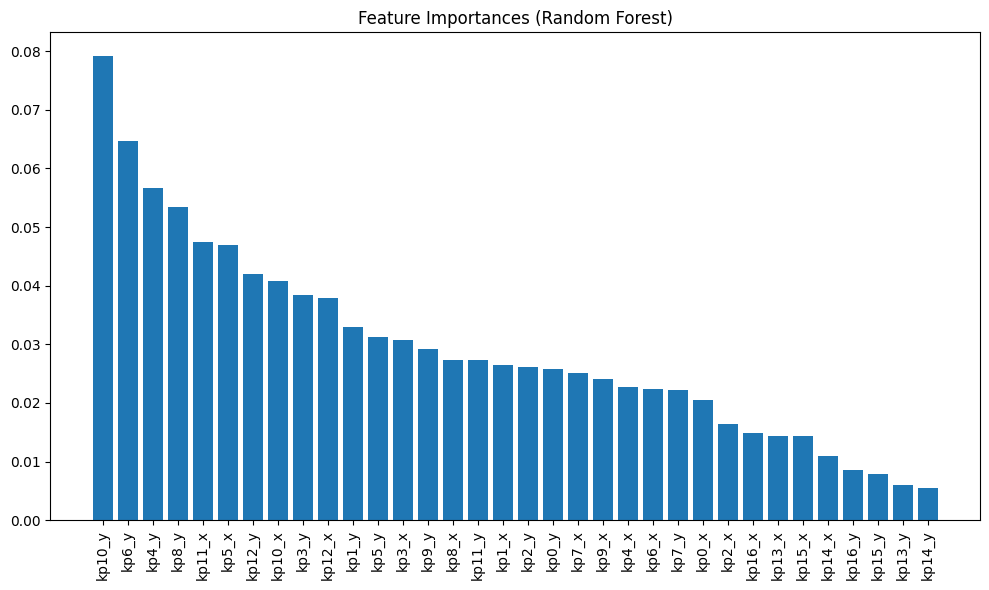

In [ ]:
# --- 6. Train a Random Forest Classifier ---
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # Helps with imbalanced classes if any
)

rf_model.fit(X_train_scaled, y_train)

# --- 7. Evaluate the Model ---
y_pred = rf_model.predict(X_test_scaled)

print("\n--- Evaluation Results (Random Forest) ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Feature Importance
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names_sorted = [feature_cols[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names_sorted, rotation=90)
plt.tight_layout()
plt.show()


In [ ]:


# --- 6. Train the SVM Model ---
print("\nTraining the SVM model...")
# Ensure y_train has more than one class for stratification or balanced class weights
if len(y_train.unique()) <= 1:
    print(f"Error: Training target variable 'y_train' has only one class: {y_train.unique()}. Cannot train classifier.")
    exit()

svm_model = SVC(C= np.float64(50.79933389275528), gamma= np.float64(0.07427781917044056), kernel= 'rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("SVM model trained successfully.")

# --- 7. Make Predictions and Evaluate the Model ---
print("\nMaking predictions on the test set...")
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
if 'le' in globals() and hasattr(le, 'classes_'):
    target_names_report = [str(cls) for cls in le.classes_]
    # Ensure labels for confusion matrix and report match actual unique values in y_test/y_pred
    unique_test_labels_sorted = sorted(y_test.unique())
    # If le.classes_ were [False, True] -> [0, 1], and y_test contains 0, 1, this is fine.
    # If le.classes_ were ['A', 'B'] -> [0, 1], this is fine.
    # We need to ensure the order of target_names_report matches the sorted unique labels if they are numeric.
    if all(isinstance(c, (int, float)) for c in unique_test_labels_sorted) and \
       all(isinstance(c, str) for c in target_names_report) and \
       len(unique_test_labels_sorted) == len(target_names_report):
        # This attempts to map sorted numeric labels to the string names from LabelEncoder
        # This might need adjustment if LabelEncoder classes are not simple True/False or ordered strings
        report_labels_ordered = unique_test_labels_sorted
    else:
        report_labels_ordered = le.transform(le.classes_) # Use the transformed numeric values corresponding to le.classes_

else: # Fallback if LabelEncoder was not used (e.g., target was already 0/1)
    unique_test_labels_sorted = sorted(y_test.unique())
    target_names_report = [f"Class {i}" for i in unique_test_labels_sorted]
    report_labels_ordered = unique_test_labels_sorted

try:
    print(classification_report(y_test, y_pred, labels=report_labels_ordered, target_names=target_names_report, zero_division=0))
except Exception as e_report:
    print(f"Could not generate classification report with specific target names/labels: {e_report}")
    print(classification_report(y_test, y_pred, zero_division=0))


print("\nConfusion Matrix:")
try:
    cm = confusion_matrix(y_test, y_pred, labels=report_labels_ordered)
    print(pd.DataFrame(cm, index=target_names_report, columns=target_names_report))
except Exception as e_cm:
    print(f"Could not generate confusion matrix with specific labels/names: {e_cm}")
    cm = confusion_matrix(y_test, y_pred) # Fallback
    print(cm)


print("\n--- Script Finished ---")



Training the SVM model...
SVM model trained successfully.

Making predictions on the test set...

Accuracy: 0.8613

Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.86      0.79      0.82      7368
   Class 1.0       0.86      0.91      0.89     10811

    accuracy                           0.86     18179
   macro avg       0.86      0.85      0.85     18179
weighted avg       0.86      0.86      0.86     18179


Confusion Matrix:
           Class 0.0  Class 1.0
Class 0.0       5827       1541
Class 1.0        980       9831

--- Script Finished ---


In [ ]:
pip install shap


In [ ]:
import shap

# Note: KernelExplainer is slow, but works with any model
explainer = shap.KernelExplainer(svm_model.predict, X_train_scaled[:100])  # Use a small sample
shap_values = explainer.shap_values(X_test_scaled[:50])  # Again, small sample for speed



  0%|          | 0/50 [00:00<?, ?it/s]

NameError: name 'feature_names' is not defined

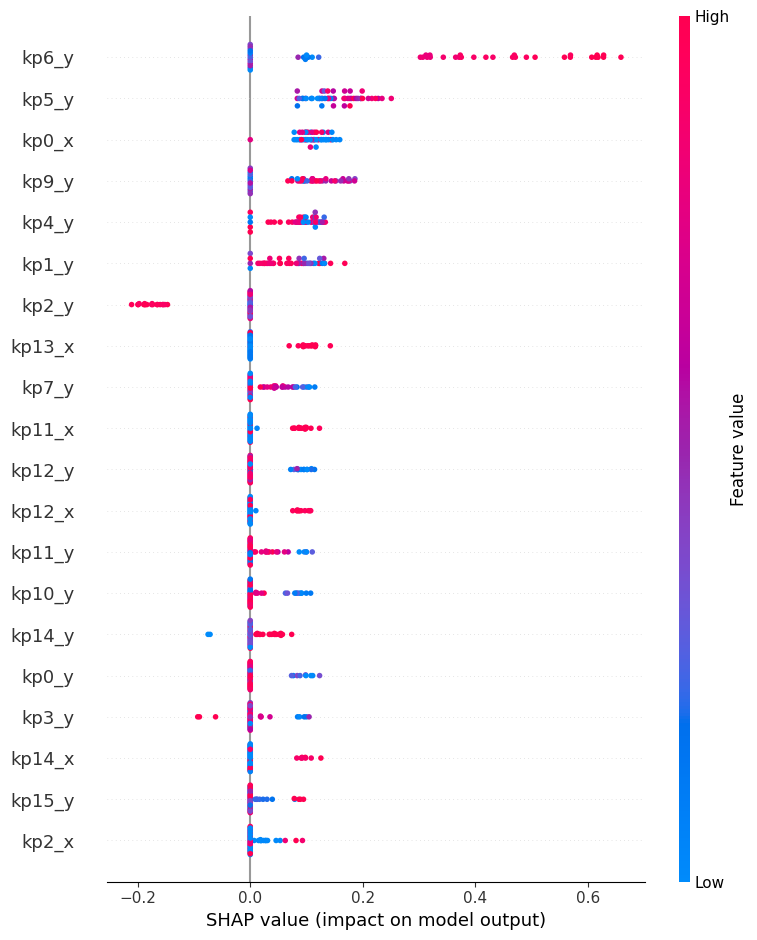

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test.iloc[:50], feature_names=feature_cols)


In [ ]:
print(shap_values)

[[0.10669628 0.         0.         ... 0.         0.         0.        ]
 [0.0839669  0.         0.         ... 0.         0.         0.        ]
 [0.09487342 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.14707117 0.         0.         ... 0.         0.         0.        ]
 [0.09261362 0.         0.         ... 0.07822836 0.         0.        ]
 [0.15915441 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
svm_model.save('/content/drive/MyDrive/svm_model.h')

AttributeError: 'SVC' object has no attribute 'save'

### EXP 6- CNN

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm

# Load your keypoints CSV
df = pd.read_csv("/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv")
df=df[df["task"]=='p']
print("Data loaded successfully.")
print("Shape of the dataframe:", df.shape)
# Set output directory
output_dir = "/content/drive/MyDrive/pose_images"
os.makedirs(output_dir, exist_ok=True)

# Parameters
image_size = 64
num_keypoints = 17

# Create pose images
def keypoints_to_image(row):
    img = np.zeros((image_size, image_size), dtype=np.uint8)
    for i in range(num_keypoints):
        x = row.get(f"kp{i}_x", np.nan)
        y = row.get(f"kp{i}_y", np.nan)
        if not np.isnan(x) and not np.isnan(y):
            x = int(np.clip(x / 640 * image_size, 0, image_size - 1))
            y = int(np.clip(y / 480 * image_size, 0, image_size - 1))
            cv2.circle(img, (x, y), radius=2, color=255, thickness=-1)
    return img

# Generate and save images
image_paths = []
for idx, row in tqdm(df.iterrows(), total=len(df)):
    img = keypoints_to_image(row)
    path = os.path.join(output_dir, f"pose_{idx}.png")
    cv2.imwrite(path, img)
    image_paths.append(path)

# Save new CSV
df["pose_image_path"] = image_paths
df.to_csv("/content/drive/MyDrive/keypoints_with_pose_images.csv", index=False)
print("✅ Done. CSV saved as keypoints_with_pose_images.csv")


<ipython-input-2-41d425fea50b>:8: DtypeWarning: Columns (38,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv")


Data loaded successfully.
Shape of the dataframe: (47208, 44)


100%|██████████| 47208/47208 [10:10<00:00, 77.37it/s] 


✅ Done. CSV saved as keypoints_with_pose_images.csv


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- 1. Load and clean the CSV ---
df = pd.read_csv("/content/drive/MyDrive/keypoints_with_pose_images.csv")
df = df.dropna(subset=['pose_image_path', 'playfully_engaged'])

# Convert label to int if needed
if df['playfully_engaged'].dtype != 'int':
    le = LabelEncoder()
    df['playfully_engaged'] = le.fit_transform(df['playfully_engaged'])

# --- 2. Train/Test split by video ---
unique_videos = df['source_video'].unique()
train_videos, test_videos = train_test_split(unique_videos, test_size=0.2, random_state=42)

train_df = df[df['source_video'].isin(train_videos)].reset_index(drop=True)
test_df = df[df['source_video'].isin(test_videos)].reset_index(drop=True)

# --- 3. Dataset Class ---
class PoseImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'pose_image_path']
        label = int(self.df.loc[idx, 'playfully_engaged'])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# --- 4. Image Transform ---
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# --- 5. Dataloaders ---
train_dataset = PoseImageDataset(train_df, transform)
test_dataset = PoseImageDataset(test_df, transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# --- 6. Simple CNN Model ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)

# --- 7. Train the CNN ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss:.4f}, Accuracy: {acc:.2f}%")

# --- 8. Evaluate the CNN ---
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(f"\nTest Accuracy: {100 * correct / total:.2f}%")


Epoch 1/5 - Loss: 2148.7150, Accuracy: 77.53%
Epoch 2/5 - Loss: 1925.9674, Accuracy: 80.54%
Epoch 3/5 - Loss: 1845.4110, Accuracy: 81.38%
Epoch 4/5 - Loss: 1780.8398, Accuracy: 82.29%
Epoch 5/5 - Loss: 1733.9332, Accuracy: 82.87%

Test Accuracy: 51.88%


### EXP 7

In [ ]:
df

,frame,sec,tracking_id,kp0_x,kp0_y,kp1_x,kp1_y,kp2_x,kp2_y,kp3_x,...,kp15_y,kp16_x,kp16_y,source_video,time,watching,playing_engaged,playfully_engaged,angrily_engaged,task
0,2,0.08,164,348,796,348,782,337,792,291,...,868,405,868,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
1,3,0.12,164,348,797,351,779,337,793,340,...,853,407,877,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
2,4,0.16,164,350,796,350,781,338,796,342,...,879,398,879,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
3,5,0.20,164,350,798,350,781,337,792,342,...,876,346,927,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
4,6,0.24,164,351,799,351,787,338,793,297,...,875,383,875,Fp17,00:00:22,1.0,2.0,0.0,0.0,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520982,15101,604.04,68,472,737,486,716,449,723,505,...,845,528,924,P16,NaN,NaN,NaN,NaN,NaN,NaN
520983,15102,604.08,68,473,737,487,716,450,723,505,...,845,529,910,P16,NaN,NaN,NaN,NaN,NaN,NaN
520984,15103,604.12,68,473,737,487,716,450,723,505,...,844,529,923,P16,NaN,NaN,NaN,NaN,NaN,NaN
520985,15104,604.16,68,474,738,488,716,451,723,502,...,845,530,923,P16,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df[df["task"]=='e']
print("Data loaded successfully.")
print("Shape of the dataframe:", df.shape)

Data loaded successfully.
Shape of the dataframe: (44600, 44)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer





# --- 2. Define Target (y) and Prepare for Feature (X) Selection ---
target_column = 'playfully_engaged'
video_id_column = 'source_video' # IMPORTANT: Verify this is the correct column name for video IDs in your CSV

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in the dataframe.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

if video_id_column not in df.columns:
    print(f"Error: Video ID column '{video_id_column}' for data splitting not found.")
    print(f"Please ensure '{video_id_column}' exists or update the 'video_id_column' variable.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Drop rows where the target variable is NaN, as they cannot be used for training or evaluation.
df.dropna(subset=[target_column], inplace=True)
print(f"\nShape of dataframe after dropping NaNs in target column '{target_column}': {df.shape}")

# Convert target variable to numeric if it's not already
if df[target_column].dtype == 'bool':
    df[target_column] = df[target_column].astype(int)
elif df[target_column].dtype == 'object':
    print(f"Target column '{target_column}' is of object type. Attempting to encode it.")
    le = LabelEncoder()
    try:
        df[target_column] = le.fit_transform(df[target_column])
        print(f"Target column '{target_column}' encoded. Classes: {le.classes_}")
        if len(le.classes_) > 2:
            print("Warning: Target variable has more than two classes. This will be a multi-class SVM.")
        elif len(le.classes_) <= 1:
            print(f"Error: Target column '{target_column}' has only one class after encoding ({le.classes_}). Cannot train a classifier.")
            exit()
    except Exception as e:
        print(f"Error encoding target column '{target_column}': {e}")
        print("Please ensure the target column contains appropriate values for classification.")
        exit()

# Define feature columns
# Identify potential keypoint columns (typically floats or integers)
potential_feature_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columns to exclude from features (USER UPDATED LIST)
# This list now means other engagement labels (like focused_engagement) MIGHT become features if numeric
columns_to_exclude_from_features = [
    target_column, video_id_column, # video_id_column is used for splitting, not as a feature
    'video_id', # if 'video_id' is different from video_id_column and also an identifier
    'sec', 'seconds', 'seconds_rounded', 'sec_rounded', 'merge_key',
    'angrily_engaged', 'playing_engaged', 'time', 'watching', 'frame', 'tracking_id','task'
]
# Add any other known non-feature or identifier columns if necessary.

# Filter out columns from the exclusion list that might not exist in the dataframe
columns_to_exclude_from_features = [col for col in columns_to_exclude_from_features if col in df.columns]

feature_cols = [col for col in potential_feature_cols if col not in columns_to_exclude_from_features]

if not feature_cols:
    print("Error: No feature columns were identified. Please check the column names, types, and exclusion list.")
    print(f"Potential numeric columns found: {potential_feature_cols}")
    print(f"Columns excluded: {columns_to_exclude_from_features}")
    exit()

print(f"\nIdentified {len(feature_cols)} feature columns: {feature_cols}")
print(f"Target column: {target_column}")
print(f"Video ID column for splitting: {video_id_column}")

# --- 3. Split Data into Training and Testing Sets based on Video IDs ---
unique_videos = df[video_id_column].unique()
print(f"\nFound {len(unique_videos)} unique videos for splitting.")

if len(unique_videos) < 2: # Need at least one video for train and one for test
    print("Error: Not enough unique videos to perform a train/test split. Need at least 2.")
    exit()
# Ensure test_size is not too large for the number of videos
test_size_videos = 0.3
if len(unique_videos) * test_size_videos < 1:
    print(f"Warning: Number of unique videos ({len(unique_videos)}) is small. Adjusting test_size for videos to ensure at least 1 test video.")
    # Ensure at least 1 video for testing, if possible.
    # If only 2 videos, it will be 1 train, 1 test. If 3, 2 train, 1 test.
    test_video_count = 1
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_video_count, random_state=2, shuffle=True)
else:
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_size_videos, random_state=2, shuffle=True)


print(f"Number of videos in training set: {len(train_video_ids)}")
print(f"Number of videos in testing set: {len(test_video_ids)}")

if len(train_video_ids) == 0 or len(test_video_ids) == 0:
    print("Error: Splitting videos resulted in an empty training or testing set of videos.")
    exit()

# Create training and testing dataframes
train_df = df[df[video_id_column].isin(train_video_ids)].copy() # Use .copy() to avoid SettingWithCopyWarning
test_df = df[df[video_id_column].isin(test_video_ids)].copy()

if train_df.empty or test_df.empty:
    print("Error: Training or testing dataframe is empty after filtering by video IDs.")
    exit()

X_train = train_df[feature_cols]
y_train = train_df[target_column]
X_test = test_df[feature_cols]
y_test = test_df[target_column]

print("\nData split into training and testing sets based on video IDs.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

if X_train.empty or X_test.empty:
    print("Error: X_train or X_test is empty. Check feature selection and data splitting.")
    exit()

print("Distribution of target variable in training set:\n", y_train.value_counts(normalize=True))
print("Distribution of target variable in test set:\n", y_test.value_counts(normalize=True))

# --- 4. Handle Missing Values in Features (Post-Split) ---
print(f"\nMissing values in X_train before imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test before imputation: {X_test.isnull().sum().sum()}")

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Use transform only on test data

# Convert imputed arrays back to DataFrames with original column names
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test after imputation: {X_test.isnull().sum().sum()}")

# --- 5. Scale Numerical Features (Post-Split and Post-Imputation) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform only on test data

print("\nFeatures scaled.")

<ipython-input-5-b62fd39950f3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[target_column], inplace=True)



Shape of dataframe after dropping NaNs in target column 'playfully_engaged': (44600, 44)

Identified 34 feature columns: ['kp0_x', 'kp0_y', 'kp1_x', 'kp1_y', 'kp2_x', 'kp2_y', 'kp3_x', 'kp3_y', 'kp4_x', 'kp4_y', 'kp5_x', 'kp5_y', 'kp6_x', 'kp6_y', 'kp7_x', 'kp7_y', 'kp8_x', 'kp8_y', 'kp9_x', 'kp9_y', 'kp10_x', 'kp10_y', 'kp11_x', 'kp11_y', 'kp12_x', 'kp12_y', 'kp13_x', 'kp13_y', 'kp14_x', 'kp14_y', 'kp15_x', 'kp15_y', 'kp16_x', 'kp16_y']
Target column: playfully_engaged
Video ID column for splitting: source_video

Found 19 unique videos for splitting.
Number of videos in training set: 13
Number of videos in testing set: 6

Data split into training and testing sets based on video IDs.
X_train shape: (28572, 34)
X_test shape: (16028, 34)
y_train shape: (28572,)
y_test shape: (16028,)
Distribution of target variable in training set:
 playfully_engaged
1.0    0.540389
0.0    0.459611
Name: proportion, dtype: float64
Distribution of target variable in test set:
 playfully_engaged
0.0    0.

In [ ]:
# Example using loguniform (better for C and gamma)
import pandas as pd

import numpy as np

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification # To generate sample data

from sklearn.metrics import classification_report
from scipy.stats import loguniform


svm_model = SVC(random_state=21, class_weight='balanced', probability=True)
param_dist = {
    'C': loguniform(1e-2, 1e2), # Example range: 0.01 to 100
    'gamma': loguniform(1e-4, 1e-1), # Example range: 0.0001 to 0.1
    'kernel': ['rbf', 'linear']
}

random_search = RandomizedSearchCV(
   estimator=svm_model,
   param_distributions=param_dist,
   n_iter=25, # Try 100 random combinations
   cv=2,
   scoring='accuracy', # Or other relevant metric
   n_jobs=-1,
   verbose=2,
   random_state=21
)

print("\nStarting RandomizedSearchCV for SVM...")
random_search.fit(X_train_scaled, y_train)
print("RandomizedSearchCV fitting complete.")
print("-" * 30)

print("\nBest Hyperparameters Found (RandomizedSearch):")
print(random_search.best_params_)
print("\nBest Cross-Validation Score (RandomizedSearch):")
print(random_search.best_score_)

best_svm_model_random = random_search.best_estimator_
y_pred_best_svm_random = best_svm_model_random.predict(X_test_scaled)
print("\nPerformance of the Best SVM Model from RandomizedSearch on the (Sample) Test Set:")
print(classification_report(y_test, y_pred_best_svm_random))


Starting RandomizedSearchCV for SVM...
Fitting 2 folds for each of 25 candidates, totalling 50 fits
RandomizedSearchCV fitting complete.
------------------------------

Best Hyperparameters Found (RandomizedSearch):
{'C': np.float64(0.40288954161165436), 'gamma': np.float64(0.0004938976330078491), 'kernel': 'rbf'}

Best Cross-Validation Score (RandomizedSearch):
0.5196696066078679

Performance of the Best SVM Model from RandomizedSearch on the (Sample) Test Set:
              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79     10717
         1.0       0.54      0.32      0.40      5311

    accuracy                           0.68     16028
   macro avg       0.63      0.59      0.59     16028
weighted avg       0.66      0.68      0.66     16028



### EXP 8

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv')

<ipython-input-11-1fcaa27fbc51>:2: DtypeWarning: Columns (38,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv')


In [ ]:
df=df[df["task"]=='d']
print("Data loaded successfully.")
print("Shape of the dataframe:", df.shape)

Data loaded successfully.
Shape of the dataframe: (0, 44)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer





# --- 2. Define Target (y) and Prepare for Feature (X) Selection ---
target_column = 'playfully_engaged'
video_id_column = 'source_video' # IMPORTANT: Verify this is the correct column name for video IDs in your CSV

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in the dataframe.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

if video_id_column not in df.columns:
    print(f"Error: Video ID column '{video_id_column}' for data splitting not found.")
    print(f"Please ensure '{video_id_column}' exists or update the 'video_id_column' variable.")
    print(f"Available columns: {df.columns.tolist()}")
    exit()

# Drop rows where the target variable is NaN, as they cannot be used for training or evaluation.
df.dropna(subset=[target_column], inplace=True)
print(f"\nShape of dataframe after dropping NaNs in target column '{target_column}': {df.shape}")

# Convert target variable to numeric if it's not already
if df[target_column].dtype == 'bool':
    df[target_column] = df[target_column].astype(int)
elif df[target_column].dtype == 'object':
    print(f"Target column '{target_column}' is of object type. Attempting to encode it.")
    le = LabelEncoder()
    try:
        df[target_column] = le.fit_transform(df[target_column])
        print(f"Target column '{target_column}' encoded. Classes: {le.classes_}")
        if len(le.classes_) > 2:
            print("Warning: Target variable has more than two classes. This will be a multi-class SVM.")
        elif len(le.classes_) <= 1:
            print(f"Error: Target column '{target_column}' has only one class after encoding ({le.classes_}). Cannot train a classifier.")
            exit()
    except Exception as e:
        print(f"Error encoding target column '{target_column}': {e}")
        print("Please ensure the target column contains appropriate values for classification.")
        exit()

# Define feature columns
# Identify potential keypoint columns (typically floats or integers)
potential_feature_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columns to exclude from features (USER UPDATED LIST)
# This list now means other engagement labels (like focused_engagement) MIGHT become features if numeric
columns_to_exclude_from_features = [
    target_column, video_id_column, # video_id_column is used for splitting, not as a feature
    'video_id', # if 'video_id' is different from video_id_column and also an identifier
    'sec', 'seconds', 'seconds_rounded', 'sec_rounded', 'merge_key',
    'angrily_engaged', 'playing_engaged', 'time', 'watching', 'frame', 'tracking_id','task'
]
# Add any other known non-feature or identifier columns if necessary.

# Filter out columns from the exclusion list that might not exist in the dataframe
columns_to_exclude_from_features = [col for col in columns_to_exclude_from_features if col in df.columns]

feature_cols = [col for col in potential_feature_cols if col not in columns_to_exclude_from_features]

if not feature_cols:
    print("Error: No feature columns were identified. Please check the column names, types, and exclusion list.")
    print(f"Potential numeric columns found: {potential_feature_cols}")
    print(f"Columns excluded: {columns_to_exclude_from_features}")
    exit()

print(f"\nIdentified {len(feature_cols)} feature columns: {feature_cols}")
print(f"Target column: {target_column}")
print(f"Video ID column for splitting: {video_id_column}")

# --- 3. Split Data into Training and Testing Sets based on Video IDs ---
unique_videos = df[video_id_column].unique()
print(f"\nFound {len(unique_videos)} unique videos for splitting.")

if len(unique_videos) < 2: # Need at least one video for train and one for test
    print("Error: Not enough unique videos to perform a train/test split. Need at least 2.")
    exit()
# Ensure test_size is not too large for the number of videos
test_size_videos = 0.3
if len(unique_videos) * test_size_videos < 1:
    print(f"Warning: Number of unique videos ({len(unique_videos)}) is small. Adjusting test_size for videos to ensure at least 1 test video.")
    # Ensure at least 1 video for testing, if possible.
    # If only 2 videos, it will be 1 train, 1 test. If 3, 2 train, 1 test.
    test_video_count = 1
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_video_count, random_state=21, shuffle=True)
else:
    train_video_ids, test_video_ids = train_test_split(unique_videos, test_size=test_size_videos, random_state=21, shuffle=True)


print(f"Number of videos in training set: {len(train_video_ids)}")
print(f"Number of videos in testing set: {len(test_video_ids)}")

if len(train_video_ids) == 0 or len(test_video_ids) == 0:
    print("Error: Splitting videos resulted in an empty training or testing set of videos.")
    exit()

# Create training and testing dataframes
train_df = df[df[video_id_column].isin(train_video_ids)].copy() # Use .copy() to avoid SettingWithCopyWarning
test_df = df[df[video_id_column].isin(test_video_ids)].copy()

if train_df.empty or test_df.empty:
    print("Error: Training or testing dataframe is empty after filtering by video IDs.")
    exit()

X_train = train_df[feature_cols]
y_train = train_df[target_column]
X_test = test_df[feature_cols]
y_test = test_df[target_column]

print("\nData split into training and testing sets based on video IDs.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

if X_train.empty or X_test.empty:
    print("Error: X_train or X_test is empty. Check feature selection and data splitting.")
    exit()

print("Distribution of target variable in training set:\n", y_train.value_counts(normalize=True))
print("Distribution of target variable in test set:\n", y_test.value_counts(normalize=True))

# --- 4. Handle Missing Values in Features (Post-Split) ---
print(f"\nMissing values in X_train before imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test before imputation: {X_test.isnull().sum().sum()}")

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Use transform only on test data

# Convert imputed arrays back to DataFrames with original column names
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test after imputation: {X_test.isnull().sum().sum()}")

# --- 5. Scale Numerical Features (Post-Split and Post-Imputation) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform only on test data

print("\nFeatures scaled.")


Shape of dataframe after dropping NaNs in target column 'playfully_engaged': (37938, 44)

Identified 34 feature columns: ['kp0_x', 'kp0_y', 'kp1_x', 'kp1_y', 'kp2_x', 'kp2_y', 'kp3_x', 'kp3_y', 'kp4_x', 'kp4_y', 'kp5_x', 'kp5_y', 'kp6_x', 'kp6_y', 'kp7_x', 'kp7_y', 'kp8_x', 'kp8_y', 'kp9_x', 'kp9_y', 'kp10_x', 'kp10_y', 'kp11_x', 'kp11_y', 'kp12_x', 'kp12_y', 'kp13_x', 'kp13_y', 'kp14_x', 'kp14_y', 'kp15_x', 'kp15_y', 'kp16_x', 'kp16_y']
Target column: playfully_engaged
Video ID column for splitting: source_video

Found 19 unique videos for splitting.
Number of videos in training set: 13
Number of videos in testing set: 6

Data split into training and testing sets based on video IDs.
X_train shape: (28618, 34)
X_test shape: (9320, 34)
y_train shape: (28618,)
y_test shape: (9320,)
Distribution of target variable in training set:
 playfully_engaged
1.0    0.536236
0.0    0.463764
Name: proportion, dtype: float64
Distribution of target variable in test set:
 playfully_engaged
0.0    0.67

In [ ]:
# --- 6. Train and Evaluate SVM Model ---
print("\n--- Training SVM Model ---")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, class_weight='balanced', probability=True) # Added class_weight and probability
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



--- Training SVM Model ---

SVM Model Evaluation:
Accuracy: 0.5401287553648069
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.46      0.57      6255
         1.0       0.39      0.70      0.50      3065

    accuracy                           0.54      9320
   macro avg       0.57      0.58      0.54      9320
weighted avg       0.64      0.54      0.55      9320

Confusion Matrix:
 [[2888 3367]
 [ 919 2146]]


### EXP 9- LSTM

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv')

<ipython-input-1-1fcaa27fbc51>:2: DtypeWarning: Columns (38,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/merged_with_forward_labels_with_tasks.csv')


In [2]:
df=df[df["task"]=='p']
print("Data loaded successfully.")
print("Shape of the dataframe:", df.shape)

Data loaded successfully.
Shape of the dataframe: (47208, 44)


In [3]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [4]:
baby_df=df.copy()

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# keypoint sütunları
keypoint_cols = [col for col in df.columns if "kp" in col and ("_x" in col or "_y" in col)]
target_column="playfully_engaged"



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import the scaler
import numpy as np
# Assuming baby_df, keypoint_cols, and target_column are defined
# and series_to_supervised is a defined function.

# Your existing code:
all_sequences_X = []
all_sequences_y = []
all_video_ids = []

# Tüm video id'leri topla
unique_videos = baby_df['source_video'].unique()
print(f"Toplam video: {len(unique_videos)}")

# Train-test video bazlı split
train_videos, test_videos = train_test_split(unique_videos, test_size=0.3, random_state=42)

X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

for video in unique_videos:
    video_df = baby_df[baby_df['source_video'] == video]
    for tid in video_df['tracking_id'].unique():
        person_df = video_df[video_df['tracking_id'] == tid].copy()
        person_df = person_df.sort_values('sec')

        # Keypoint değerleri
        kp_data = person_df[keypoint_cols].values
        label_data = person_df[target_column].values

        # Supervised format
        # Assuming n_in = 30, n_out = 1 for series_to_supervised
        # and series_to_supervised handles cases with insufficient data for a full sequence
        if len(kp_data) > 30: # Ensure there's enough data for at least one sequence
            supervised_kp = series_to_supervised(kp_data, n_in=30, n_out=1)
            # Ensure supervised_kp is not empty and has the expected structure
            if not supervised_kp.empty:
                # The last kp_data.shape[1] columns in supervised_kp are the target if n_out > 0 and target is part of kp_data
                # Based on X_seq = supervised_kp.iloc[:, :-kp_data.shape[1]].values,
                # it implies the supervised function creates features and targets,
                # and you are selecting only the input features for X_seq.
                # And y_seq = label_data[30:] implies labels are taken directly from original label_data.

                X_seq_input_features = supervised_kp.iloc[:, :30*kp_data.shape[1]].values # Adjust if series_to_supervised output differs

                # Ensure y_seq aligns with X_seq
                # If series_to_supervised creates sequences of length 30 input and 1 output step,
                # and you take y_seq from label_data[30:], this should align if each row in supervised_kp
                # corresponds to a starting point in label_data.
                num_sequences = X_seq_input_features.shape[0]

                if num_sequences > 0 and len(label_data) >= 30 + num_sequences -1 : # Check alignment
                    # X_seq = X_seq_input_features.reshape((num_sequences, 30, kp_data.shape[1]))
                    # y_seq_aligned = label_data[30 : 30 + num_sequences] # Align y_seq with X_seq

                    # The original code for X_seq and y_seq generation:
                    X_seq = supervised_kp.iloc[:, :-kp_data.shape[1]].values # Assumes last columns are target features to be dropped
                    y_seq_current = label_data[30:] # This needs to align with the number of sequences in X_seq

                    # Make sure X_seq and y_seq_current have the same number of samples
                    # The number of samples from series_to_supervised is typically len(data) - n_in - n_out + 1
                    # For X_seq, it would be len(kp_data) - 30 - 1 + 1 = len(kp_data) - 30
                    # So y_seq should be label_data[30 : 30 + (len(kp_data) - 30)] = label_data[30 : len(kp_data)]

                    # Adjusting y_seq to match the number of sequences generated by series_to_supervised more reliably
                    # Assuming series_to_supervised(data, n_in, n_out) generates (len(data) - n_in - n_out + 1) samples.
                    # Here, n_out=1, so it generates (len(kp_data) - 30) samples for X.
                    num_generated_sequences = len(kp_data) - 30
                    if num_generated_sequences > 0:
                        X_seq = X_seq_input_features[:num_generated_sequences] # Take the generated sequences
                        X_seq = X_seq.reshape((num_generated_sequences, 30, kp_data.shape[1]))
                        y_seq = label_data[30 : 30 + num_generated_sequences]


                        if video in train_videos:
                            X_train_list.append(X_seq)
                            y_train_list.append(y_seq)
                        else:
                            X_test_list.append(X_seq)
                            y_test_list.append(y_seq)

# Final train/test arrays
if X_train_list: # Check if lists are not empty
    X_train = np.concatenate(X_train_list, axis=0)
    y_train = np.concatenate(y_train_list, axis=0)
else:
    X_train, y_train = np.array([]), np.array([]) # Or handle as an error/warning

if X_test_list:
    X_test = np.concatenate(X_test_list, axis=0)
    y_test = np.concatenate(y_test_list, axis=0)
else:
    X_test, y_test = np.array([]), np.array([])

print("✅ Train/test verisi hazır.")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# --- SCALING THE DATA ---
# Check if X_train is not empty before proceeding with scaling
if X_train.size > 0 and X_test.size > 0 : # Ensure X_test also has data if you intend to scale it
    # 1. Initialize the Scaler
    scaler = StandardScaler()

    # 2. Reshape X_train for scaling
    #    The scaler expects a 2D array (n_samples, n_features).
    #    Your X_train is 3D (n_samples, n_timesteps, n_keypoint_features).
    #    We reshape it to (n_samples * n_timesteps, n_keypoint_features),
    #    fit the scaler, transform, and then reshape back.
    original_shape_X_train = X_train.shape
    X_train_reshaped = X_train.reshape(-1, original_shape_X_train[2])

    # 3. Fit the scaler on the TRAINING data
    scaler.fit(X_train_reshaped)

    # 4. Transform the TRAINING data
    X_train_scaled_reshaped = scaler.transform(X_train_reshaped)
    # Reshape X_train back to its original 3D shape
    X_train_scaled = X_train_scaled_reshaped.reshape(original_shape_X_train)

    # 5. Reshape and Transform the TESTING data
    original_shape_X_test = X_test.shape
    X_test_reshaped = X_test.reshape(-1, original_shape_X_test[2])
    X_test_scaled_reshaped = scaler.transform(X_test_reshaped)
    # Reshape X_test back to its original 3D shape
    X_test_scaled = X_test_scaled_reshaped.reshape(original_shape_X_test)

    print("✅ Veri ölçeklendirildi.")
    print("X_train_scaled:", X_train_scaled.shape)
    print("X_test_scaled:", X_test_scaled.shape)

    # Now you would use X_train_scaled, y_train, X_test_scaled, and y_test for your model
    # For example: model.fit(X_train_scaled, y_train)
    #            model.evaluate(X_test_scaled, y_test)
elif X_train.size == 0:
    print("⚠️ X_train is empty. Scaling cannot be performed.")
    # Assign empty arrays or handle as appropriate for your workflow
    X_train_scaled, X_test_scaled = np.array([]), np.array([])
elif X_test.size == 0 and X_train.size > 0 : # X_train has data, but X_test is empty
    scaler = StandardScaler()
    original_shape_X_train = X_train.shape
    X_train_reshaped = X_train.reshape(-1, original_shape_X_train[2])
    scaler.fit(X_train_reshaped)
    X_train_scaled_reshaped = scaler.transform(X_train_reshaped)
    X_train_scaled = X_train_scaled_reshaped.reshape(original_shape_X_train)
    X_test_scaled = np.array([]) # X_test remains empty
    print("✅ X_train verisi ölçeklendirildi. X_test boş.")
    print("X_train_scaled:", X_train_scaled.shape)


# Note: You generally do NOT scale your target variables (y_train, y_test),
# especially if they are categorical labels for classification.
# If it's a regression task with a wide range of output values,
# target scaling might sometimes be considered, but it's less common.

Toplam video: 17
✅ Train/test verisi hazır.
X_train: (33936, 30, 34) y_train: (33936,)
X_test: (11743, 30, 34) y_test: (11743,)
✅ Veri ölçeklendirildi.
X_train_scaled: (33936, 30, 34)
X_test_scaled: (11743, 30, 34)


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ✅ LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Modeli eğit
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8314 - loss: 0.3492 - val_accuracy: 0.7046 - val_loss: 1.3035
Epoch 2/30
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9472 - loss: 0.1228 - val_accuracy: 0.5853 - val_loss: 1.6745
Epoch 3/30
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9523 - loss: 0.1168 - val_accuracy: 0.6565 - val_loss: 2.0246
Epoch 4/30
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9685 - loss: 0.0731 - val_accuracy: 0.6596 - val_loss: 1.9337
Epoch 5/30
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9705 - loss: 0.0699 - val_accuracy: 0.5888 - val_loss: 2.0707
Epoch 6/30
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9691 - loss: 0.0732 - val_accuracy: 0.6286 - val_loss: 2.3588


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())



AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Provided series_to_supervised function ---
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# --- Configuration ---
N_IN_TIMESTEPS = 20 # Number of input timesteps for the sequence
N_OUT_TIMESTEPS = 1 # Corresponds to n_out in series_to_supervised, relevant for X_seq slicing



# 1. Collect all unique video IDs
unique_videos = baby_df['source_video'].unique()
print(f"Toplam video: {len(unique_videos)}")

# 2. Split videos into training and testing sets
train_videos, test_videos = train_test_split(unique_videos, test_size=0.3, random_state=42)
print(f"Training videos: {len(train_videos)}, Test videos: {len(test_videos)}")

# 3. Fit the StandardScaler ONLY on the training data
scaler = StandardScaler()
all_train_kp_for_scaling = []

print("Collecting data for scaler fitting (from training videos only)...")
for video_id in train_videos:
    video_df = baby_df[baby_df['source_video'] == video_id]
    for tid in video_df['tracking_id'].unique():
        person_df = video_df[video_df['tracking_id'] == tid].copy()
        # Ensure data is sorted by time for sequence generation
        person_df = person_df.sort_values('sec')

        # Need at least N_IN_TIMESTEPS + 1 rows to produce one sequence
        if len(person_df) > N_IN_TIMESTEPS:
            kp_data = person_df[keypoint_cols].values
            all_train_kp_for_scaling.append(kp_data)

if not all_train_kp_for_scaling:
    # This can happen if training videos are too short or have no valid tracks
    print("Warning: No data available from training videos to fit the scaler. Scaling will not be applied.")
    # Optionally, raise an error or handle as per your needs
    # For this example, we'll proceed without a fitted scaler, which means kp_scaled will be same as kp_data
    # A better approach might be to ensure sufficient training data or use a default scaler.
    # For simplicity, we'll make scaler.transform do nothing if not fitted.
    # A real `StandardScaler` would error if transform is called before fit.
    # So, we create a dummy scaler if no data.
    class DummyScaler:
        def fit(self, data): pass
        def transform(self, data): return data
    scaler = DummyScaler()

else:
    concatenated_train_kp = np.concatenate(all_train_kp_for_scaling, axis=0)
    if concatenated_train_kp.shape[0] > 0 : # Ensure there is data to fit
        scaler.fit(concatenated_train_kp)
        print("Scaler fitted on training data.")
    else: # Should be caught by all_train_kp_for_scaling check, but as a safeguard
        print("Warning: Concatenated training keypoints resulted in empty data. Scaler not fitted.")
        class DummyScaler: # Define dummy scaler again if fitting fails
            def fit(self, data): pass
            def transform(self, data): return data
        scaler = DummyScaler()


# 4. Prepare sequences for training and testing sets
X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

NUM_KEYPOINT_FEATURES = len(keypoint_cols)

print("Processing videos to create sequences...")
for video_id in unique_videos:
    video_df = baby_df[baby_df['source_video'] == video_id]
    for tid in video_df['tracking_id'].unique():
        person_df = video_df[video_df['tracking_id'] == tid].copy()
        person_df = person_df.sort_values('sec')

        # Sequences can only be formed if there are more data points than N_IN_TIMESTEPS
        if len(person_df) <= N_IN_TIMESTEPS:
            # print(f"Skipping track {tid} in video {video_id} due to insufficient data points ({len(person_df)}).")
            continue

        kp_data = person_df[keypoint_cols].values
        label_data = person_df[target_column].values.ravel() # .ravel() if target_column is a list of one item

        # Apply the PRE-FITTED scaler
        kp_scaled = scaler.transform(kp_data)

        # Convert to supervised learning format
        # n_out=1 means series_to_supervised will also create columns for var(t) using original data
        supervised_kp_df = series_to_supervised(kp_scaled, n_in=N_IN_TIMESTEPS, n_out=N_OUT_TIMESTEPS)

        if supervised_kp_df.empty:
            # print(f"Skipping track {tid} in video {video_id} as series_to_supervised resulted in empty dataframe.")
            continue

        # The last 'NUM_KEYPOINT_FEATURES * N_OUT_TIMESTEPS' columns are the 'y' part from series_to_supervised
        # We want only the input part (X)
        X_seq = supervised_kp_df.iloc[:, :-(NUM_KEYPOINT_FEATURES * N_OUT_TIMESTEPS)].values

        num_sequences = X_seq.shape[0]
        if num_sequences == 0:
            continue

        # Labels correspond to the end of the input window (or start of output window)
        # series_to_supervised drops the first N_IN_TIMESTEPS rows
        # So, the first sequence's label corresponds to label_data[N_IN_TIMESTEPS]
        y_seq = label_data[N_IN_TIMESTEPS : N_IN_TIMESTEPS + num_sequences]

        # Ensure X_seq and y_seq have a consistent number of samples
        if X_seq.shape[0] != len(y_seq):
            print(f"Warning: Mismatch in X and y sequence lengths for track {tid}, video {video_id}. Skipping.")
            print(f"X_seq shape[0]: {X_seq.shape[0]}, y_seq len: {len(y_seq)}")
            continue

        # Reshape X_seq to (samples, timesteps, features)
        X_seq_reshaped = X_seq.reshape((num_sequences, N_IN_TIMESTEPS, NUM_KEYPOINT_FEATURES))

        if video_id in train_videos:
            X_train_list.append(X_seq_reshaped)
            y_train_list.append(y_seq)
        elif video_id in test_videos: # Make sure it's explicitly in test_videos
            X_test_list.append(X_seq_reshaped)
            y_test_list.append(y_seq)

# 5. Final train/test arrays concatenation
if X_train_list:
    X_train = np.concatenate(X_train_list, axis=0)
    y_train = np.concatenate(y_train_list, axis=0)
else:
    X_train = np.empty((0, N_IN_TIMESTEPS, NUM_KEYPOINT_FEATURES))
    y_train = np.empty((0,))
    print("Warning: Training data is empty after processing.")

if X_test_list:
    X_test = np.concatenate(X_test_list, axis=0)
    y_test = np.concatenate(y_test_list, axis=0)
else:
    X_test = np.empty((0, N_IN_TIMESTEPS, NUM_KEYPOINT_FEATURES))
    y_test = np.empty((0,))
    print("Warning: Test data is empty after processing.")

print("✅ Train/test verisi hazır.")
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

# Further checks
if X_train.shape[0] == 0 and len(train_videos) > 0:
    print("Note: X_train is empty. This might be due to all training video tracks being too short or other processing issues.")
if X_test.shape[0] == 0 and len(test_videos) > 0:
     print("Note: X_test is empty. This might be due to all test video tracks being too short or other processing issues.")

Toplam video: 17
Training videos: 11, Test videos: 6
Scaler fitted on training data.
Processing videos to create sequences...
✅ Train/test verisi hazır.
X_train shape: (34286, 20, 34) | y_train shape: (34286,)
X_test shape: (11883, 20, 34) | y_test shape: (11883,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ✅ LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Modeli eğit
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8417 - loss: 0.3291 - val_accuracy: 0.7557 - val_loss: 1.0070
Epoch 2/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9434 - loss: 0.1310 - val_accuracy: 0.7737 - val_loss: 1.0343
Epoch 3/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9553 - loss: 0.0986 - val_accuracy: 0.7055 - val_loss: 1.5394
Epoch 4/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9468 - loss: 0.1157 - val_accuracy: 0.7183 - val_loss: 1.8345
Epoch 5/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9664 - loss: 0.0789 - val_accuracy: 0.7427 - val_loss: 1.4977
Epoch 6/30
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9708 - loss: 0.0682 - val_accuracy: 0.7260 - val_loss: 1.9094


### ALEXNET

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset



n_in_steps = 30  # Sequence length (will be Height for 2D CNN input)

# --- 1. Determine number of features and padding ---
num_original_features = len(keypoint_cols)

# For 2D CNN, target_H and target_W are not used to reshape each timestep's features into a small image.
# Instead, padded_feature_size will be the width of our input image, and n_in_steps the height.
# We still might want to pad features to a consistent size, e.g., to make it a power of 2 or a round number.
# Let's keep the original padding logic for `padded_feature_size`.
# This means each of the `n_in_steps` rows in our 2D input will have `padded_feature_size` columns.
target_H_orig_padding_logic = int(np.ceil(np.sqrt(num_original_features)))
target_W_orig_padding_logic = target_H_orig_padding_logic
padded_feature_size = target_H_orig_padding_logic * target_W_orig_padding_logic # This will be the WIDTH of our 2D input
padding_needed = padded_feature_size - num_original_features

print(f"Original features per time step: {num_original_features}")
print(f"Each time step will be padded to: {padded_feature_size} features (this will be the input WIDTH for 2D CNN).")
print(f"Padding needed per time step: {padding_needed}")
print(f"Input to 2D CNN will have H={n_in_steps}, W={padded_feature_size}")

# --- 2. Split video IDs for training and testing ---
if 'source_video' not in baby_df.columns:
    raise ValueError("DataFrame must contain 'source_video' column for splitting.")
unique_videos = baby_df['source_video'].unique()

train_videos = np.array([])
test_videos = np.array([])

if len(unique_videos) < 2:
    print("Warning: Too few unique videos for video-based train/test split.")
    if len(unique_videos) == 1:
        print("Only one unique video found. Using all data for training and creating an empty test set.")
        train_videos = unique_videos
    else:
        print("Error: No unique videos found. Cannot proceed.")
        exit()
else:
    train_videos, test_videos = train_test_split(unique_videos, test_size=0.3, random_state=42)

print(f"Total unique videos: {len(unique_videos)}")
print(f"Training videos: {list(train_videos)}, Count: {len(train_videos)}")
print(f"Testing videos: {list(test_videos)}, Count: {len(test_videos)}")


# --- 3. Fit Scaler on Training Data ---
print("Fitting scaler on training data...")
scaler = StandardScaler()
scaler_fitted = False

if len(train_videos) > 0:
    training_kp_data_for_scaler = []
    for video_id in train_videos:
        video_df = baby_df[baby_df['source_video'] == video_id]
        for tid in video_df['tracking_id'].unique():
            person_df = video_df[(video_df['tracking_id'] == tid) & (video_df['source_video'] == video_id)].copy().sort_values('sec')
            # Ensure there's enough data to form at least one sequence for scaling purposes as well
            if not person_df.empty and len(person_df[keypoint_cols]) >= n_in_steps:
                training_kp_data_for_scaler.append(person_df[keypoint_cols].values)

    if training_kp_data_for_scaler:
        all_train_kp_flat = np.concatenate(training_kp_data_for_scaler, axis=0)
        if all_train_kp_flat.shape[0] > 0:
            scaler.fit(all_train_kp_flat)
            print("Scaler fitted.")
            scaler_fitted = True
        else:
            print("Warning: Concatenated training keypoint data is empty. Scaler will not be fitted.")
    else:
        print("Warning: No keypoint data found for training videos to fit the scaler. Scaler will not be fitted.")
else:
    print("Warning: No training videos available to fit scaler. Scaler will not be fitted.")


# --- 4. Prepare Sequences for 2D CNN ---
X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

# Determine which videos to process for sequence generation
videos_to_assign_to_train = train_videos
videos_to_assign_to_test = test_videos

print("Preparing sequences for 2D CNN...")
for video_id in unique_videos:
    video_df = baby_df[baby_df['source_video'] == video_id]
    for tid in video_df['tracking_id'].unique():
        person_df = video_df[(video_df['tracking_id'] == tid) & (video_df['source_video'] == video_id)].copy()
        person_df = person_df.sort_values('sec')

        if len(person_df) < n_in_steps:
            continue

        kp_data_original = person_df[keypoint_cols].values
        if scaler_fitted:
            kp_data_processed = scaler.transform(kp_data_original)
        else:
            kp_data_processed = kp_data_original

        label_data = person_df[target_column].values

        num_sequences_possible = len(kp_data_processed) - n_in_steps + 1
        if num_sequences_possible <= 0:
            continue

        current_X_sequences_list_for_person = [] # Store sequences for current person
        current_y_sequences_list_for_person = []

        for i in range(num_sequences_possible):
            # Get the window of n_in_steps for keypoint data
            raw_feature_sequence = kp_data_processed[i : i + n_in_steps] # Shape: (n_in_steps, num_original_features)

            # Create the 2D "image" for the sequence: (n_in_steps, padded_feature_size)
            sequence_2d_image = np.zeros((n_in_steps, padded_feature_size), dtype=np.float32)

            for t_idx in range(n_in_steps):
                features_at_t = raw_feature_sequence[t_idx, :] # Features for one time step
                if padding_needed > 0:
                    padded_features_at_t = np.pad(features_at_t, (0, padding_needed), 'constant', constant_values=0.0)
                else:
                    padded_features_at_t = features_at_t
                sequence_2d_image[t_idx, :] = padded_features_at_t

            # Add channel dimension: (1, n_in_steps, padded_feature_size)
            # This ensures each sequence has a channel dimension.
            current_X_sequences_list_for_person.append(sequence_2d_image[np.newaxis, :, :])
            current_y_sequences_list_for_person.append(label_data[i + n_in_steps - 1])

        if not current_X_sequences_list_for_person:
            continue

        # Concatenate all sequences from this person
        # Each item in list is (1, n_in_steps, padded_feature_size)
        # Resulting shape: (num_person_sequences, 1, n_in_steps, padded_feature_size)
        X_person_sequences = np.concatenate(current_X_sequences_list_for_person, axis=0)
        y_person_sequences = np.array(current_y_sequences_list_for_person)

        if video_id in videos_to_assign_to_train:
            X_train_list.append(X_person_sequences)
            y_train_list.append(y_person_sequences)
        elif video_id in videos_to_assign_to_test:
            X_test_list.append(X_person_sequences)
            y_test_list.append(y_person_sequences)

# --- 5. Final Train/Test Arrays ---
# Input shape for 2D CNN: (N, C, H, W) where C=1, H=n_in_steps, W=padded_feature_size
if X_train_list:
    X_train = np.concatenate(X_train_list, axis=0)
    y_train = np.concatenate(y_train_list, axis=0).astype(np.int64)
else:
    X_train = np.empty((0, 1, n_in_steps, padded_feature_size), dtype=np.float32)
    y_train = np.array([], dtype=np.int64)

if X_test_list:
    X_test = np.concatenate(X_test_list, axis=0)
    y_test = np.concatenate(y_test_list, axis=0).astype(np.int64)
else:
    X_test = np.empty((0, 1, n_in_steps, padded_feature_size), dtype=np.float32)
    y_test = np.array([], dtype=np.int64)

print("✅ Train/test data prepared for 2D CNN.")
# This print should now reflect the channel dimension if data preparation is correct
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

num_classes = 0
if y_train.size > 0:
    unique_train_labels = np.unique(y_train)
    num_classes = len(unique_train_labels)
    print(f"Number of unique classes in y_train: {num_classes}")
    print(f"Unique y_train labels: {unique_train_labels}")
elif y_test.size > 0:
    unique_test_labels = np.unique(y_test)
    num_classes = len(unique_test_labels)
    print(f"Warning: y_train is empty. Using y_test to determine num_classes: {num_classes}")
    print(f"Unique y_test labels: {unique_test_labels}")
else:
    print("Error: Both y_train and y_test are empty. Cannot determine num_classes.")
    exit()

if num_classes <= 1 and (X_train.size > 0 or X_test.size > 0) : # Check if data exists but not enough classes
    print(f"Error: num_classes is {num_classes}. Need at least 2 classes for classification.")
    exit()
if num_classes == 0: # Should be caught by above, but as a safeguard
    print("Error: num_classes is 0. No data available.")
    exit()


# --- 6. Define Adapted 2D CNN Model (Inspired by AlexNet structure) ---
class AlexNet2D_Adapted(nn.Module):
    def __init__(self, num_classes, input_channels=1, input_h=30, input_w=36): # input_h=n_in_steps, input_w=padded_feature_size
        super(AlexNet2D_Adapted, self).__init__()

        self.features = nn.Sequential(
            # Input: (N, C_in, H_in, W_in) = (N, 1, n_in_steps, padded_feature_size)
            # Example: (N, 1, 30, 36)
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1), # (N, 32, 30, 36)
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2), # (N, 32, 15, 18)

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # (N, 64, 15, 18)
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2), # (N, 64, 7, 9)

            nn.Conv2d(64, 128, kernel_size=3, padding=1), # (N, 128, 7, 9)
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            # Optional: Another MaxPool2d if dimensions are still large enough
            # nn.MaxPool2d(kernel_size=2, stride=2), # Example: (N, 128, 3, 4) - check if H/W > 1 after this
        )

        # Calculate the size after conv features by doing a dummy pass
        with torch.no_grad():
            dummy_input = torch.zeros(1, input_channels, input_h, input_w)
            conv_out_shape = self.features(dummy_input).shape

        # Adaptive pool to get a fixed size output (1,1) for each feature map
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1)) # Output: (N, 128, 1, 1)

        num_features_after_pool = conv_out_shape[1] # Number of channels from last conv layer (e.g., 128)

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features_after_pool, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        # x should be (N, C, H, W)
        x = self.features(x)
        x = self.adaptive_pool(x) # (N, num_channels_after_conv, 1, 1)
        x = torch.flatten(x, 1)    # (N, num_channels_after_conv)
        x = self.classifier(x)
        return x

# --- 7. Prepare PyTorch DataLoaders ---
if X_train.shape[0] == 0:
    print("Error: Training data (X_train) is empty. Cannot create DataLoaders or train model.")
    exit()

# Ensure X_train has 4 dimensions (N, C, H, W) before converting to tensor
if X_train.ndim == 3: # If X_train is (N, H, W)
    print("Reshaping X_train from (N, H, W) to (N, 1, H, W) for DataLoader.")
    X_train = X_train[:, np.newaxis, :, :] # Add channel dimension

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
print("Training DataLoader created.")

test_loader = None
if X_test.shape[0] > 0:
    if X_test.ndim == 3: # If X_test is (N, H, W)
        print("Reshaping X_test from (N, H, W) to (N, 1, H, W) for DataLoader.")
        X_test = X_test[:, np.newaxis, :, :] # Add channel dimension
    X_test_tensor = torch.from_numpy(X_test).float()
    y_test_tensor = torch.from_numpy(y_test).long()
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    print("Test DataLoader created.")
else:
    print("Test data is empty. No Test DataLoader will be created.")


# --- 8. Initialize Model, Loss, Optimizer ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = AlexNet2D_Adapted(
    num_classes=num_classes,
    input_channels=1, # Data prepared with 1 channel
    input_h=n_in_steps,          # Height of the 2D input
    input_w=padded_feature_size  # Width of the 2D input
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("2D Model, Loss, and Optimizer initialized.")
print(model)

# --- 9. Training Loop ---
num_epochs = 10  # Adjust as needed

print("Starting 2D CNN training...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, batch_data in enumerate(train_loader):
        inputs, labels = batch_data
        inputs, labels = inputs.to(device), labels.to(device)

        # Explicitly ensure inputs have 4 dimensions (B, C, H, W)
        # This is a safeguard. Ideally, data prep (step 4 & 5) and DataLoader prep (step 7)
        # should ensure inputs already have the correct shape (B, 1, H, W).
        if inputs.ndim == 3:  # If inputs tensor is (B, H, W)
            inputs = inputs.unsqueeze(1)  # Reshape to (B, 1, H, W)

        # Verify input shape just before model call for debugging
        # if i == 0 and epoch == 0:
        #     print(f"Shape of 'inputs' tensor going into model: {inputs.shape}")


        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 10 == 0: # Print every 10 mini-batches
            if len(train_loader) > 0 : # Avoid division by zero if train_loader is small
                 print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    if len(train_loader) > 0:
        print(f'Epoch {epoch+1} average loss: {running_loss / len(train_loader):.4f}')
    else:
        print(f'Epoch {epoch+1} completed (no training data in loader).')

    # --- 10. (Optional) Validation Loop ---
    if test_loader:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs_val, labels_val in test_loader:
                inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)

                # Explicitly ensure validation inputs also have 4 dimensions
                if inputs_val.ndim == 3:
                    inputs_val = inputs_val.unsqueeze(1)

                outputs_val = model(inputs_val)
                _, predicted = torch.max(outputs_val.data, 1)
                total += labels_val.size(0)
                correct += (predicted == labels_val).sum().item()

        if total > 0:
            accuracy = 100 * correct / total
            print(f'Accuracy on test set after epoch {epoch+1}: {accuracy:.2f}%')
        # else: # No print needed if test_loader was None or empty
            # print("No test samples to evaluate or test_loader is empty.")

print('2D CNN Training finished!')

# TODO: Save the model if needed
# torch.save(model.state_dict(), 'alexnet2d_adapted_baby_action.pth')


Original features per time step: 34
Each time step will be padded to: 36 features (this will be the input WIDTH for 2D CNN).
Padding needed per time step: 2
Input to 2D CNN will have H=30, W=36
Total unique videos: 17
Training videos: ['Fp29', 'Fp35', 'Fp19', 'Fp30', 'Fp40', 'Fp21', 'Fp28', 'Fp31', 'Fp34', 'Fp20', 'Fp27'], Count: 11
Testing videos: ['Fp17', 'Fp18', 'Fp24', 'Fp39', 'Fp33', 'Fp38'], Count: 6
Fitting scaler on training data...
Scaler fitted.
Preparing sequences for 2D CNN...
✅ Train/test data prepared for 2D CNN.
X_train shape: (33971, 30, 36) y_train shape: (33971,)
X_test shape: (11757, 30, 36) y_test shape: (11757,)
Number of unique classes in y_train: 2
Unique y_train labels: [0 1]
Reshaping X_train from (N, H, W) to (N, 1, H, W) for DataLoader.
Training DataLoader created.
Reshaping X_test from (N, H, W) to (N, 1, H, W) for DataLoader.
Test DataLoader created.
Using device: cuda
2D Model, Loss, and Optimizer initialized.
AlexNet2D_Adapted(
  (features): Sequential(
 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler # StandardScaler might not be suitable for this spatial approach
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# --- User-Defined Parameters ---
ORIGINAL_FRAME_WIDTH = 1440
ORIGINAL_FRAME_HEIGHT = 1080


# --- Parameters for Spatial Pose Image Representation ---
n_in_steps = 30  # Sequence length (will be number of CHANNELS for 2D CNN input)
GRID_H = 64      # Height of the spatial grid for each pose
GRID_W = 64      # Width of the spatial grid for each pose

print(f"Original frame dimensions: {ORIGINAL_FRAME_WIDTH}x{ORIGINAL_FRAME_HEIGHT}")
print(f"Input to 2D CNN will be (Batch, Channels={n_in_steps}, Height={GRID_H}, Width={GRID_W})")

# --- 2. Split video IDs for training and testing ---
if 'source_video' not in baby_df.columns:
    raise ValueError("DataFrame must contain 'source_video' column for splitting.")
unique_videos = baby_df['source_video'].unique()

train_videos = np.array([])
test_videos = np.array([])

if len(unique_videos) < 2:
    print("Warning: Too few unique videos for video-based train/test split.")
    if len(unique_videos) == 1:
        print("Only one unique video found. Using all data for training, empty test set.")
        train_videos = unique_videos
    else:
        print("Error: No unique videos found. Cannot proceed.")
        exit()
else:
    train_videos, test_videos = train_test_split(unique_videos, test_size=0.3, random_state=42)

print(f"Total unique videos: {len(unique_videos)}")
print(f"Training videos: {list(train_videos)}, Count: {len(train_videos)}")
print(f"Testing videos: {list(test_videos)}, Count: {len(test_videos)}")


# --- 3. Scaler (Commented Out - Per-pose normalization is now handled in step 4) ---
print("Skipping global StandardScaler. Per-pose normalization/scaling to grid is applied during sequence preparation.")


# --- 4. Prepare Sequences for 2D CNN (Spatial Pose Images) ---
X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

videos_to_assign_to_train = train_videos
videos_to_assign_to_test = test_videos

print("Preparing sequences as spatial pose images for 2D CNN...")
for video_id in unique_videos:
    video_df = baby_df[baby_df['source_video'] == video_id]
    for tid in video_df['tracking_id'].unique():
        person_df = video_df[(video_df['tracking_id'] == tid) & (video_df['source_video'] == video_id)].copy()
        person_df = person_df.sort_values('sec')

        if len(person_df) < n_in_steps:
            continue

        # Keypoint data for this person: shape (num_timesteps_for_person, num_original_features)
        kp_data_all_timesteps = person_df[keypoint_cols].values
        label_data = person_df[target_column].values

        num_sequences_possible = len(kp_data_all_timesteps) - n_in_steps + 1
        if num_sequences_possible <= 0:
            continue

        current_X_sequences_list_for_person = []
        current_y_sequences_list_for_person = []

        for i in range(num_sequences_possible):
            # Get the window of n_in_steps for keypoint data
            # Shape: (n_in_steps, num_original_features), where num_original_features = 17*2 = 34
            raw_kp_sequence = kp_data_all_timesteps[i : i + n_in_steps]

            # Create the multi-channel 2D "image" for the sequence
            # Shape: (n_in_steps_as_channels, GRID_H, GRID_W)
            sequence_as_spatial_image = np.zeros((n_in_steps, GRID_H, GRID_W), dtype=np.float32)

            for t_idx in range(n_in_steps): # Iterate through each time step in the sequence
                # features_at_t has shape (num_original_features), e.g., (kp0_x, kp0_y, kp1_x, kp1_y, ...)
                features_at_t = raw_kp_sequence[t_idx, :]

                # This grid will represent the pose at the current time step t_idx
                current_timestep_grid = np.zeros((GRID_H, GRID_W), dtype=np.float32)

                for kp_i in range(int(17)): # Iterate through 17 keypoints
                    kp_x_original = features_at_t[kp_i * 2]     # Absolute pixel coordinate X
                    kp_y_original = features_at_t[kp_i * 2 + 1] # Absolute pixel coordinate Y

                    if pd.isna(kp_x_original) or pd.isna(kp_y_original):
                        continue # Skip NaN coordinates

                    # Normalize keypoint coordinates to [0, 1] range based on original frame dimensions
                    kp_x_normalized = kp_x_original / ORIGINAL_FRAME_WIDTH
                    kp_y_normalized = kp_y_original / ORIGINAL_FRAME_HEIGHT

                    # Scale normalized coordinates to the grid dimensions and clip
                    grid_x = int(np.clip(kp_x_normalized * (GRID_W - 1), 0, GRID_W - 1))
                    grid_y = int(np.clip(kp_y_normalized * (GRID_H - 1), 0, GRID_H - 1))

                    current_timestep_grid[grid_y, grid_x] = 1.0 # Mark keypoint presence

                sequence_as_spatial_image[t_idx, :, :] = current_timestep_grid

            current_X_sequences_list_for_person.append(sequence_as_spatial_image) # Shape (n_in_steps, GRID_H, GRID_W)
            current_y_sequences_list_for_person.append(label_data[i + n_in_steps - 1])

        if not current_X_sequences_list_for_person:
            continue

        # Stack sequences for this person. Each item is (n_in_steps, GRID_H, GRID_W)
        # Resulting X_person_sequences shape: (num_person_sequences, n_in_steps_as_channels, GRID_H, GRID_W)
        X_person_sequences = np.stack(current_X_sequences_list_for_person, axis=0)
        y_person_sequences = np.array(current_y_sequences_list_for_person)

        if video_id in videos_to_assign_to_train:
            X_train_list.append(X_person_sequences)
            y_train_list.append(y_person_sequences)
        elif video_id in videos_to_assign_to_test:
            X_test_list.append(X_person_sequences)
            y_test_list.append(y_person_sequences)

# --- 5. Final Train/Test Arrays ---
# Expected shape: (N_total_sequences, n_in_steps_as_channels, GRID_H, GRID_W)
if X_train_list:
    X_train = np.concatenate(X_train_list, axis=0)
    y_train = np.concatenate(y_train_list, axis=0).astype(np.int64)
else:
    X_train = np.empty((0, n_in_steps, GRID_H, GRID_W), dtype=np.float32)
    y_train = np.array([], dtype=np.int64)

if X_test_list:
    X_test = np.concatenate(X_test_list, axis=0)
    y_test = np.concatenate(y_test_list, axis=0).astype(np.int64)
else:
    X_test = np.empty((0, n_in_steps, GRID_H, GRID_W), dtype=np.float32)
    y_test = np.array([], dtype=np.int64)

print("✅ Train/test data prepared for 2D CNN (spatial pose images).")
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape) # Should be (N, n_in_steps, GRID_H, GRID_W)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

num_classes = 0
if y_train.size > 0:
    unique_train_labels = np.unique(y_train)
    num_classes = len(unique_train_labels)
    print(f"Number of unique classes in y_train: {num_classes}")
    print(f"Unique y_train labels: {unique_train_labels}")
elif y_test.size > 0:
    unique_test_labels = np.unique(y_test)
    num_classes = len(unique_test_labels)
    print(f"Warning: y_train is empty. Using y_test to determine num_classes: {num_classes}")
    print(f"Unique y_test labels: {unique_test_labels}")
else:
    print("Error: Both y_train and y_test are empty. Cannot determine num_classes.")
    exit()

if num_classes <= 1 and (X_train.size > 0 or X_test.size > 0) :
    print(f"Error: num_classes is {num_classes}. Need at least 2 classes for classification.")
    exit()
if num_classes == 0:
    print("Error: num_classes is 0. No data available.")
    exit()


# --- 6. Define Adapted 2D CNN Model for Spatial Pose Images ---
class AlexNet2D_SpatialPose(nn.Module):
    # input_channels will now be n_in_steps
    def __init__(self, num_classes, input_channels, input_h, input_w):
        super(AlexNet2D_SpatialPose, self).__init__()

        self.features = nn.Sequential(
            # Input: (N, C_in=n_in_steps, H_in=GRID_H, W_in=GRID_W)
            # Example: (N, 30, 64, 64)
            nn.Conv2d(input_channels, 64, kernel_size=3, padding=1), # Keep H, W same
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2), # H, W become GRID_H/2, GRID_W/2 (e.g., 32x32)

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2), # H, W become GRID_H/4, GRID_W/4 (e.g., 16x16)

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            # Optional: another conv/pool layer if GRID_H/W are large enough
            nn.MaxPool2d(kernel_size=2, stride=2), # H, W become GRID_H/8, GRID_W/8 (e.g., 8x8)
        )

        with torch.no_grad():
            dummy_input = torch.zeros(1, input_channels, input_h, input_w)
            conv_out_shape = self.features(dummy_input).shape

        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1)) # Output: (N, last_conv_channels, 1, 1)

        num_features_after_pool = conv_out_shape[1] # Channels from last conv layer (e.g., 256)

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features_after_pool, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        # x input shape: (N, n_in_steps_as_channels, GRID_H, GRID_W)
        x = self.features(x)
        x = self.adaptive_pool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# --- 7. Prepare PyTorch DataLoaders ---
if X_train.shape[0] == 0:
    print("Error: Training data (X_train) is empty. Cannot create DataLoaders or train model.")
    exit()

# X_train and X_test should already be (N, n_in_steps, GRID_H, GRID_W) from Step 5
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
print("Training DataLoader created.")

test_loader = None
if X_test.shape[0] > 0:
    X_test_tensor = torch.from_numpy(X_test).float()
    y_test_tensor = torch.from_numpy(y_test).long()
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    print("Test DataLoader created.")
else:
    print("Test data is empty. No Test DataLoader will be created.")


# --- 8. Initialize Model, Loss, Optimizer ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = AlexNet2D_SpatialPose(
    num_classes=num_classes,
    input_channels=n_in_steps, # Number of channels is the sequence length
    input_h=GRID_H,
    input_w=GRID_W
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("2D Spatial Pose Model, Loss, and Optimizer initialized.")
print(model)

# --- 9. Training Loop ---
num_epochs = 10  # Adjust as needed

print("Starting 2D Spatial Pose CNN training...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, batch_data in enumerate(train_loader):
        inputs, labels = batch_data
        inputs, labels = inputs.to(device), labels.to(device)

        # Inputs should already be (B, n_in_steps, GRID_H, GRID_W)
        # No unsqueeze(1) needed here.
        # if i == 0 and epoch == 0:
        #     print(f"Shape of 'inputs' tensor going into model: {inputs.shape}")

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 10 == 0:
            if len(train_loader) > 0 :
                 print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    if len(train_loader) > 0:
        print(f'Epoch {epoch+1} average loss: {running_loss / len(train_loader):.4f}')
    else:
        print(f'Epoch {epoch+1} completed (no training data in loader).')

    # --- 10. (Optional) Validation Loop ---
    if test_loader:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs_val, labels_val in test_loader:
                inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)
                # inputs_val should also be (B, n_in_steps, GRID_H, GRID_W)
                outputs_val = model(inputs_val)
                _, predicted = torch.max(outputs_val.data, 1)
                total += labels_val.size(0)
                correct += (predicted == labels_val).sum().item()

        if total > 0:
            accuracy = 100 * correct / total
            print(f'Accuracy on test set after epoch {epoch+1}: {accuracy:.2f}%')

print('2D Spatial Pose CNN Training finished!')

# TODO: Save the model if needed
# torch.save(model.state_dict(), 'alexnet2d_spatial_pose_action.pth')


Original frame dimensions: 1440x1080
Input to 2D CNN will be (Batch, Channels=30, Height=64, Width=64)
Total unique videos: 17
Training videos: ['Fp29', 'Fp35', 'Fp19', 'Fp30', 'Fp40', 'Fp21', 'Fp28', 'Fp31', 'Fp34', 'Fp20', 'Fp27'], Count: 11
Testing videos: ['Fp17', 'Fp18', 'Fp24', 'Fp39', 'Fp33', 'Fp38'], Count: 6
Skipping global StandardScaler. Per-pose normalization/scaling to grid is applied during sequence preparation.
Preparing sequences as spatial pose images for 2D CNN...


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler # StandardScaler might not be suitable for this spatial approach
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# --- User-Defined Parameters ---
ORIGINAL_FRAME_WIDTH = 1440
ORIGINAL_FRAME_HEIGHT = 1080


# --- Parameters for Spatial Pose Image Representation ---
n_in_steps = 30  # Sequence length (will be number of CHANNELS for 2D CNN input)
GRID_H = 64      # Height of the spatial grid for each pose
GRID_W = 64      # Width of the spatial grid for each pose

print(f"Original frame dimensions: {ORIGINAL_FRAME_WIDTH}x{ORIGINAL_FRAME_HEIGHT}")
print(f"Input to 2D CNN will be (Batch, Channels={n_in_steps}, Height={GRID_H}, Width={GRID_W})")

# --- 2. Split video IDs for training and testing ---
if 'source_video' not in baby_df.columns:
    raise ValueError("DataFrame must contain 'source_video' column for splitting.")
unique_videos = baby_df['source_video'].unique()
print(f"Found unique video IDs: {unique_videos}")


train_videos = np.array([])
test_videos = np.array([])

if len(unique_videos) < 2:
    print("Warning: Too few unique videos for video-based train/test split.")
    if len(unique_videos) == 1:
        print("Only one unique video found. Using all data for training, empty test set.")
        train_videos = unique_videos
    else:
        print("Error: No unique videos found. Cannot proceed.")
        exit()
else:
    # Sort unique_videos to ensure consistent splitting if the order from .unique() varies
    train_videos, test_videos = train_test_split(np.sort(unique_videos), test_size=0.3, random_state=42)

print(f"Total unique videos: {len(unique_videos)}")
print(f"Training videos: {list(train_videos)}, Count: {len(train_videos)}")
print(f"Testing videos: {list(test_videos)}, Count: {len(test_videos)}")


# --- 3. Scaler (Commented Out - Per-pose normalization is now handled in step 4) ---
print("Skipping global StandardScaler. Per-pose normalization/scaling to grid is applied during sequence preparation.")


# --- 4. Prepare Sequences for 2D CNN (Spatial Pose Images) ---
X_train_list, y_train_list = [], []
X_test_list, y_test_list = [], []

videos_to_assign_to_train = train_videos
videos_to_assign_to_test = test_videos

print("Preparing sequences as spatial pose images for 2D CNN...") # CRASH POINT
for video_idx, video_id in enumerate(unique_videos):
    print(f"  Processing video {video_idx + 1}/{len(unique_videos)}: {video_id}")
    video_df = baby_df[baby_df['source_video'] == video_id]

    unique_tracking_ids_in_video = video_df['tracking_id'].unique()
    for tid_idx, tid in enumerate(unique_tracking_ids_in_video):
        person_df = video_df[(video_df['tracking_id'] == tid) & (video_df['source_video'] == video_id)].copy()
        person_df = person_df.sort_values('sec')

        print(f"    Processing person {tid_idx + 1}/{len(unique_tracking_ids_in_video)} (ID: {tid}) from video {video_id}.DataFrame length for this person: {len(person_df)}")

        if len(person_df) < n_in_steps:
            print(f"      Skipping person ID {tid} in video {video_id} due to insufficient data (Length: {len(person_df)}, Needed: {n_in_steps})")
            continue

        # Keypoint data for this person: shape (num_timesteps_for_person, num_original_features)
        kp_data_all_timesteps = person_df[keypoint_cols].values
        label_data = person_df[target_column].values

        num_sequences_possible = len(kp_data_all_timesteps) - n_in_steps + 1
        print(f"      Number of sequences possible for this person: {num_sequences_possible}")

        if num_sequences_possible <= 0: # Should be caught by len(person_df) < n_in_steps, but as a safeguard
            continue

        # Pre-allocate array for this person's sequences
        # Shape: (num_sequences_possible, n_in_steps_as_channels, GRID_H, GRID_W)
        try:
            print(f"      Attempting to allocate array of shape: ({num_sequences_possible}, {n_in_steps}, {GRID_H}, {GRID_W})")
            X_person_sequences_direct = np.zeros((num_sequences_possible, n_in_steps, GRID_H, GRID_W), dtype=np.float32)
            y_person_sequences_direct = np.zeros(num_sequences_possible, dtype=np.int64)
        except MemoryError:
            print(f"      ❌ MEMORY ERROR: Failed to allocate array for person {tid}, video {video_id}. Shape: ({num_sequences_possible}, {n_in_steps}, {GRID_H}, {GRID_W}). Skipping this person.")
            continue # Skip to the next person
        except Exception as e:
            print(f"      ❌ ERROR during allocation for person {tid}, video {video_id}: {e}. Skipping this person.")
            continue


        sequence_idx_for_person = 0

        for i in range(num_sequences_possible):
            raw_kp_sequence = kp_data_all_timesteps[i : i + n_in_steps]
            sequence_as_spatial_image = np.zeros((n_in_steps, GRID_H, GRID_W), dtype=np.float32)

            for t_idx in range(n_in_steps):
                features_at_t = raw_kp_sequence[t_idx, :]
                current_timestep_grid = np.zeros((GRID_H, GRID_W), dtype=np.float32)

                for kp_i in range(int(17)):
                    kp_x_original = features_at_t[kp_i * 2]
                    kp_y_original = features_at_t[kp_i * 2 + 1]

                    if pd.isna(kp_x_original) or pd.isna(kp_y_original):
                        continue

                    kp_x_normalized = kp_x_original / ORIGINAL_FRAME_WIDTH
                    kp_y_normalized = kp_y_original / ORIGINAL_FRAME_HEIGHT

                    grid_x = int(np.clip(kp_x_normalized * (GRID_W - 1), 0, GRID_W - 1))
                    grid_y = int(np.clip(kp_y_normalized * (GRID_H - 1), 0, GRID_H - 1))

                    current_timestep_grid[grid_y, grid_x] = 1.0

                sequence_as_spatial_image[t_idx, :, :] = current_timestep_grid

            X_person_sequences_direct[sequence_idx_for_person] = sequence_as_spatial_image
            y_person_sequences_direct[sequence_idx_for_person] = label_data[i + n_in_steps - 1]
            sequence_idx_for_person += 1

        if X_person_sequences_direct.shape[0] > 0:
            if video_id in videos_to_assign_to_train:
                X_train_list.append(X_person_sequences_direct)
                y_train_list.append(y_person_sequences_direct)
            elif video_id in videos_to_assign_to_test:
                X_test_list.append(X_person_sequences_direct)
                y_test_list.append(y_person_sequences_direct)

# --- 5. Final Train/Test Arrays ---
# Expected shape: (N_total_sequences, n_in_steps_as_channels, GRID_H, GRID_W)
if X_train_list:
    try:
        print("Concatenating training data...")
        X_train = np.concatenate(X_train_list, axis=0)
        y_train = np.concatenate(y_train_list, axis=0).astype(np.int64)
    except MemoryError:
        print("❌ MEMORY ERROR during final concatenation of X_train_list. Data might be too large.")
        # Handle error, e.g., by exiting or trying to use a subset
        exit()
else:
    X_train = np.empty((0, n_in_steps, GRID_H, GRID_W), dtype=np.float32)
    y_train = np.array([], dtype=np.int64)

if X_test_list:
    try:
        print("Concatenating testing data...")
        X_test = np.concatenate(X_test_list, axis=0)
        y_test = np.concatenate(y_test_list, axis=0).astype(np.int64)
    except MemoryError:
        print("❌ MEMORY ERROR during final concatenation of X_test_list. Data might be too large.")
        exit()
else:
    X_test = np.empty((0, n_in_steps, GRID_H, GRID_W), dtype=np.float32)
    y_test = np.array([], dtype=np.int64)

print("✅ Train/test data prepared for 2D CNN (spatial pose images).")
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

num_classes = 0
if y_train.size > 0:
    unique_train_labels = np.unique(y_train)
    num_classes = len(unique_train_labels)
    print(f"Number of unique classes in y_train: {num_classes}")
    print(f"Unique y_train labels: {unique_train_labels}")
elif y_test.size > 0:
    unique_test_labels = np.unique(y_test)
    num_classes = len(unique_test_labels)
    print(f"Warning: y_train is empty. Using y_test to determine num_classes: {num_classes}")
    print(f"Unique y_test labels: {unique_test_labels}")
else:
    print("Error: Both y_train and y_test are empty. Cannot determine num_classes.")
    exit()

if num_classes <= 1 and (X_train.size > 0 or X_test.size > 0) :
    print(f"Error: num_classes is {num_classes}. Need at least 2 classes for classification.")
    exit()
if num_classes == 0:
    print("Error: num_classes is 0. No data available.")
    exit()


# --- 6. Define Adapted 2D CNN Model for Spatial Pose Images ---
class AlexNet2D_SpatialPose(nn.Module):
    # input_channels will now be n_in_steps
    def __init__(self, num_classes, input_channels, input_h, input_w):
        super(AlexNet2D_SpatialPose, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        with torch.no_grad():
            dummy_input = torch.zeros(1, input_channels, input_h, input_w)
            conv_out_shape = self.features(dummy_input).shape

        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        num_features_after_pool = conv_out_shape[1]

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features_after_pool, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.adaptive_pool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# --- 7. Prepare PyTorch DataLoaders ---
if X_train.shape[0] == 0:
    print("Error: Training data (X_train) is empty. Cannot create DataLoaders or train model.")
    exit()

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
print("Training DataLoader created.")

test_loader = None
if X_test.shape[0] > 0:
    X_test_tensor = torch.from_numpy(X_test).float()
    y_test_tensor = torch.from_numpy(y_test).long()
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    print("Test DataLoader created.")
else:
    print("Test data is empty. No Test DataLoader will be created.")


# --- 8. Initialize Model, Loss, Optimizer ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = AlexNet2D_SpatialPose(
    num_classes=num_classes,
    input_channels=n_in_steps,
    input_h=GRID_H,
    input_w=GRID_W
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("2D Spatial Pose Model, Loss, and Optimizer initialized.")
print(model)

# --- 9. Training Loop ---
num_epochs = 10

print("Starting 2D Spatial Pose CNN training...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, batch_data in enumerate(train_loader):
        inputs, labels = batch_data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 10 == 0:
            if len(train_loader) > 0 :
                 print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    if len(train_loader) > 0:
        print(f'Epoch {epoch+1} average loss: {running_loss / len(train_loader):.4f}')
    else:
        print(f'Epoch {epoch+1} completed (no training data in loader).')

    # --- 10. (Optional) Validation Loop ---
    if test_loader:
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs_val, labels_val in test_loader:
                inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)
                outputs_val = model(inputs_val)
                _, predicted = torch.max(outputs_val.data, 1)
                total += labels_val.size(0)
                correct += (predicted == labels_val).sum().item()

        if total > 0:
            accuracy = 100 * correct / total
            print(f'Accuracy on test set after epoch {epoch+1}: {accuracy:.2f}%')

print('2D Spatial Pose CNN Training finished!')

# TODO: Save the model if needed
# torch.save(model.state_dict(), 'alexnet2d_spatial_pose_action.pth')


Original frame dimensions: 1440x1080
Input to 2D CNN will be (Batch, Channels=30, Height=64, Width=64)
Found unique video IDs: ['Fp17' 'Fp18' 'Fp19' 'Fp20' 'Fp21' 'Fp24' 'Fp27' 'Fp28' 'Fp29' 'Fp30'
 'Fp31' 'Fp33' 'Fp34' 'Fp35' 'Fp38' 'Fp39' 'Fp40']
Total unique videos: 17
Training videos: ['Fp29', 'Fp35', 'Fp19', 'Fp30', 'Fp40', 'Fp21', 'Fp28', 'Fp31', 'Fp34', 'Fp20', 'Fp27'], Count: 11
Testing videos: ['Fp17', 'Fp18', 'Fp24', 'Fp39', 'Fp33', 'Fp38'], Count: 6
Skipping global StandardScaler. Per-pose normalization/scaling to grid is applied during sequence preparation.
Preparing sequences as spatial pose images for 2D CNN...
  Processing video 1/17: Fp17
    Processing person 1/2 (ID: 164) from video Fp17.DataFrame length for this person: 884
      Number of sequences possible for this person: 855
      Attempting to allocate array of shape: (855, 30, 64, 64)
    Processing person 2/2 (ID: 167) from video Fp17.DataFrame length for this person: 1075
      Number of sequences possible fo